# I. PROJET 1 - CLASSIFICATION DES PINGOUINS

### 1. Entrainement d'un arbre de classification (profondeur = 1)

<a id="preparation-des-donnees"></a>
#### a. Préparation des données

In [1]:
# Import des bibliothèques :
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, RocCurveDisplay, roc_curve, precision_recall_curve, auc, make_scorer
from sklearn.metrics import mean_squared_error as MSE
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.ensemble import RandomForestRegressor, BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import missingno as msno

In [2]:
# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

In [3]:
# Import du jeu de données :
pingouins = pd.read_csv("dataset-a.csv", 
                   sep = ",",
                   encoding = "utf-8",
                   engine = "python",
                   decimal = ",")

In [4]:
# Affichage des premières lignes du dataset 'pingouins' pour s'assurer de l'import :
pingouins.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


#### b. Nettoyage des données

In [5]:
# Affichage des informations sur le tableau :
pingouins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
# Décompte du nombre de doublons :
nb_doublons = pingouins.duplicated().sum()

In [7]:
# Affichage du nombre de doublons :
print(f"Il existe {nb_doublons} doublon(s).")

Il existe 0 doublon(s).


In [8]:
# Sélection des colonnes 'species', 'culmen_lengh_mm' et 'culmen_depth_mm' :
pingouins_culmen = pingouins[['species', 'culmen_length_mm', 'culmen_depth_mm']].copy()

In [9]:
# Affichage des premières lignes de 'pingouins_culmen' :
pingouins_culmen.head(3)

,species,culmen_length_mm,culmen_depth_mm
0,Adelie,39.1,18.7
1,Adelie,39.5,17.4
2,Adelie,40.3,18.0


In [10]:
# Affichage du nombre de lignes du dataset 'pingouins_culmen' :
print("Nombre de lignes :", pingouins_culmen.shape[0])

# Affichage du nombre de colonnes :
print("Nombre de colonnes :", pingouins_culmen.shape[1])

Nombre de lignes : 344
Nombre de colonnes : 3


In [11]:
# Affichage du type de données contenues dans le dataset 'pingouins_culmen' :
print("Les types de données contenues dans le dataset 'pingouins_culmen' sont :")
print(pingouins_culmen.dtypes)

Les types de données contenues dans le dataset 'pingouins_culmen' sont :
species              object
culmen_length_mm    float64
culmen_depth_mm     float64
dtype: object


In [12]:
# Affichage du contenu de la colonnes 'species' du dataset 'pingouins' :
print("Les valeurs prises par la variable 'species' sont :", pingouins_culmen['species'].unique())

Les valeurs prises par la variable 'species' sont : ['Adelie' 'Chinstrap' 'Gentoo']


In [13]:
# Affichage du nombre de valeurs nulles par variables :
print("Le nombre de valeurs nulles par variables est de :")
pingouins_culmen.isnull().sum()

Le nombre de valeurs nulles par variables est de :


species             0
culmen_length_mm    2
culmen_depth_mm     2
dtype: int64

In [14]:
# Suppression des lignes contenant des valeurs nulles : 
pingouins_culmen.dropna(inplace = True)
print('Les lignes contenant des valeurs nulles ont été supprimées.')

Les lignes contenant des valeurs nulles ont été supprimées.


In [15]:
# Affichage du nombre de valeurs nulles par variables après traitement des données :
print("Le nombre de valeurs nulles par variables après traitement des données est de :")
pingouins_culmen.isnull().sum()

Le nombre de valeurs nulles par variables après traitement des données est de :


species             0
culmen_length_mm    0
culmen_depth_mm     0
dtype: int64

In [16]:
# Affichage du nombre de lignes du dataset 'pingouins_culmen' après traitement des données :
print("Nombre de lignes :", pingouins_culmen.shape[0])

Nombre de lignes : 342


In [17]:
# Réinitialisation de l'index :
pingouins_culmen.reset_index(drop = True, inplace = True)
print("L'index a été réinitialisé.")

L'index a été réinitialisé.


In [18]:
# Affichage de la description du tableau :
pingouins_culmen.describe()

,culmen_length_mm,culmen_depth_mm
count,342.000000,342.000000
mean,43.921930,17.151170
std,5.459584,1.974793
min,32.100000,13.100000
25%,39.225000,15.600000
50%,44.450000,17.300000
75%,48.500000,18.700000
max,59.600000,21.500000


#### c. Analyse des variables

> species : nom de l'espèce de manchot concernée

> culmen_length_mm : longueur du culmen, en millimètres

> culmen_depth_mm : profondeur du culmen, en millimètres

> Le dataset 'pingouins_culmen' contient :
> - 2 variables quantitatives continues : 
>   - Longueur du culmen ('culmen_length_mm', en mm)
>   - Profondeur du culmen ('culmen_depth_mm', en mm)
> - 1 variable qualitative nominale : 
>   - Espèce ('species')

In [19]:
# Décompte du nombre d'échantillons pour chaque espèce de manchots :
espèces_nb = pingouins_culmen['species'].value_counts()

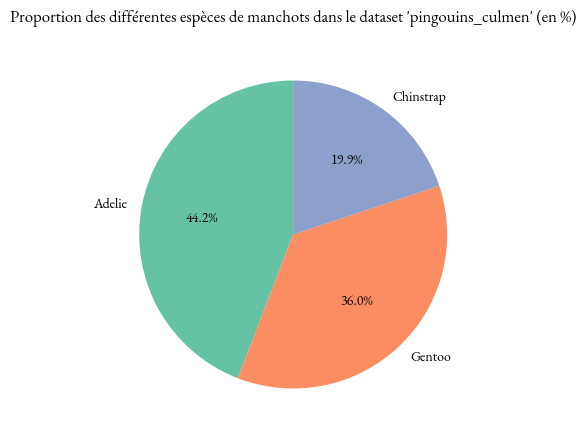

In [20]:
# Création de la figure :
plt.figure(figsize = (5, 5))    # Visualisation des proportions des différentes espèces de manchots

# Création du pie chart :
plt.pie(espèces_nb, 
        labels = espèces_nb.index,
        autopct = '%1.1f%%',
        startangle = 90,
        colors = plt.get_cmap('Set2').colors)

# Ajout du titre :
plt.title("Proportion des différentes espèces de manchots dans le dataset 'pingouins_culmen' (en %)",
          fontsize = 12,
          pad = 15)

# Affichage du graphique :
plt.show()

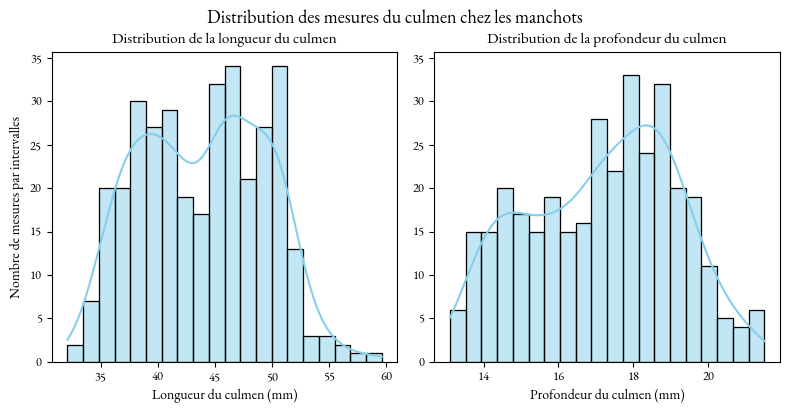

In [21]:
# Création de la figure avec deux sous-graphes côte à côte :
fig, axes = plt.subplots(1, 2, figsize = (8, 4))

# -----------------Histogramme de la longueur du culmen-------------------

# Création du premier subplot :
sns.histplot(pingouins_culmen['culmen_length_mm'], 
             bins = 20, 
             kde = True,
             color = 'skyblue', 
             ax = axes[0])

# Personnalisation des axes et du titre :
axes[0].set_title('Distribution de la longueur du culmen', 
                  fontsize = 11)
axes[0].set_xlabel('Longueur du culmen (mm)', 
                   fontsize = 10)
axes[0].set_ylabel('Nombre de mesures par intervalles', 
                   fontsize = 10)
axes[0].tick_params(axis = 'both', 
                    which = 'major', 
                    labelsize = 9)

# -------------------Histogramme de la profondeur du culmen-------------------

# Création du deuxième subplot :
sns.histplot(pingouins_culmen['culmen_depth_mm'], 
             bins = 20,
             kde = True,
             color = 'skyblue', 
             ax = axes[1])

# Personnalisation du titre : 
axes[1].set_title('Distribution de la profondeur du culmen', 
                  fontsize = 11)

# Personnalisation de l'axe des x :
axes[1].set_xlabel('Profondeur du culmen (mm)', 
                   fontsize = 10)

# Personnalisation de l'axe des y :
axes[1].set_ylabel('')

# Personnalisation des graduations :
axes[1].tick_params(axis = 'both', 
                    which = 'major', 
                    labelsize = 9)

# Harmonisation des limites de l'axe Y :
y_max = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1]) 
axes[0].set_ylim(0, y_max)  
axes[1].set_ylim(0, y_max)

# Ajustement de l'espacement entre les sous-graphes :
plt.tight_layout()

# Ajout d'un titre global à la figure :
fig.suptitle('Distribution des mesures du culmen chez les manchots', 
             fontsize = 13, 
             y = 1.02)

# Affichage de la figure :
plt.show()

In [22]:
# Sélection des variables :
correlation_value = pingouins_culmen['culmen_length_mm'].corr(pingouins_culmen['culmen_depth_mm'])

# Affichage de la corrélation :
print(f"Le coefficient de corrélation entre culmen_length_mm et culmen_depth_mm est : {correlation_value:.2f}")

Le coefficient de corrélation entre culmen_length_mm et culmen_depth_mm est : -0.24


> Il n'existe pas de phénomène de colinéarité.

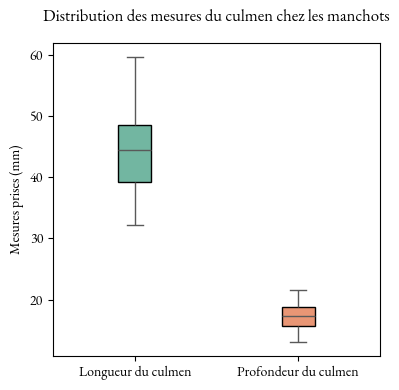

In [23]:
# Sélection des variables à afficher :
data_melted = pd.melt(pingouins_culmen, 
                      value_vars = ['culmen_length_mm', 'culmen_depth_mm'])

# Création de la figure :
plt.figure(figsize = (4, 4))    # Recherche des outliers

# Création du boxplot avec une palette personnalisée et des bordures :
sns.boxplot(x = 'variable', 
            y = 'value', 
            data = data_melted,
            width = 0.2,
            palette = 'Set2',
            hue = 'variable',
            legend = False,
            linewidth = 1,
            boxprops = dict(edgecolor = 'black'))

# Ajout du titre au graphique :
plt.title("Distribution des mesures du culmen chez les manchots", 
          fontsize = 12, 
          pad = 15)

# Modification des noms des variables sur l'axe des X :
plt.xticks(ticks = [0, 1], 
           labels = ['Longueur du culmen', 'Profondeur du culmen'])

# Ajout des étiquettes aux axes :
plt.xlabel('')
plt.ylabel('Mesures prises (mm)')

# Affichage du graphique :
plt.tight_layout()
plt.show()

> Il n'existe pas de points au-delà de la moustache du boxplot, donc pas d'outliers.

#### d. Séparation des caractéristiques et de leurs étiquettes

In [24]:
# Séparation des caractéristiques (X) et des étiquettes (y) :
X = pingouins_culmen.drop(columns = ["species"]) 
y = pingouins_culmen["species"]

In [25]:
# Affichage des premières lignes de X :
X.head(3)

,culmen_length_mm,culmen_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0


In [26]:
# Affichage du contenu de 'y' :
y.head(3)

0    Adelie
1    Adelie
2    Adelie
Name: species, dtype: object

In [27]:
# Affichage du type d'objets obtenus :
print("X est de type ", type(X))
print("y est de type ", type(y))

X est de type  <class 'pandas.core.frame.DataFrame'>
y est de type  <class 'pandas.core.series.Series'>


#### e. Types de variables

In [28]:
# Affichage du type de données de X : 
print(X.dtypes)

culmen_length_mm    float64
culmen_depth_mm     float64
dtype: object


In [29]:
# Affichage d'un résumé du DataFrame X :
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   culmen_length_mm  342 non-null    float64
 1   culmen_depth_mm   342 non-null    float64
dtypes: float64(2)
memory usage: 5.5 KB
None


In [30]:
# Affichage d'un résumé de la série y :
print(y.info())

<class 'pandas.core.series.Series'>
RangeIndex: 342 entries, 0 to 341
Series name: species
Non-Null Count  Dtype 
--------------  ----- 
342 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB
None


#### f. Entrainement de l'arbre de classification

In [31]:
# Valeur fixe pour le paramètre random_state :
SEED = 42

In [32]:
# Division du dataset en deux partie (80% entrainement, 20% test) :
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,   # 20% test
                                                    stratify = y,
                                                    random_state = SEED)

In [33]:
# Instanciation de dt :
dt = DecisionTreeClassifier(max_depth = 1,
                            random_state = SEED)

In [34]:
# Ajustement de dt à l'ensemble d'entrainement :
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [35]:
# Prédiction des étiquettes de l'ensemble test :
y_pred = dt.predict(X_test)

In [36]:
# Evaluation de l'accuracy score du modèle :
accuracy = accuracy_score(y_test, y_pred)
print("L'acuracy score obtenu est de ", round(accuracy, 2))

L'acuracy score obtenu est de  0.74


### 2. Visualisation des données (scatterplot)

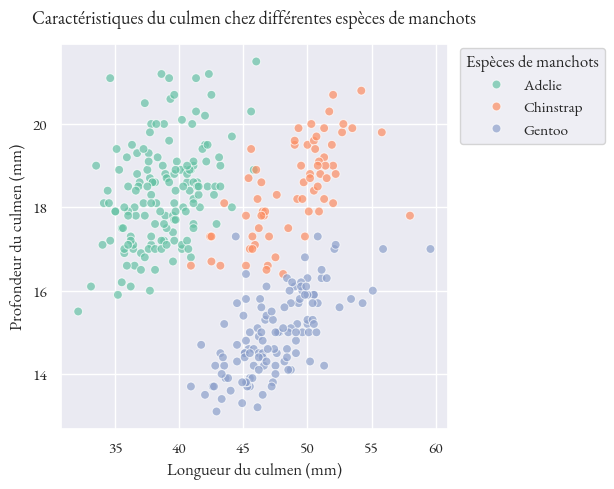

In [37]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Paramétrage du style seaborn :
sns.set()

# Paramétrage de la police :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création du scatterplot :
sns.scatterplot(data = pingouins_culmen, 
                x = "culmen_length_mm", 
                y = "culmen_depth_mm", 
                hue = "species",
                palette = "Set2",
                alpha = 0.7,
                s = 40,
                edgecolor = "white",
                linewidth = 0.7)

# Ajout du titre :
plt.title("Caractéristiques du culmen chez différentes espèces de manchots",
          pad = 15,
          fontsize = 13)

# Ajout des étiquettes aux axes des x et des y :
plt.xlabel("Longueur du culmen (mm)")
plt.ylabel("Profondeur du culmen (mm)")

# Modification du titre de la légende :
plt.legend(title = "Espèces de manchots",
           bbox_to_anchor = (1.01, 1.01))

# Affichage du graphique :
plt.show()

### 3. Affichage de la partition des données par l'arbre

<Figure size 500x500 with 0 Axes>

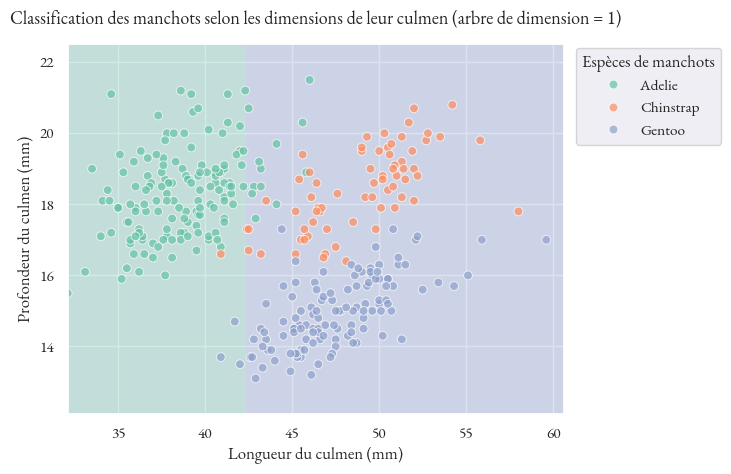

In [38]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Normalisation des couleurs pour correspondre aux classes :
tab10_norm = mpl.colors.Normalize(vmin = 0, vmax = 2)

# Création de la palette à partir de Set2 :
palette = sns.color_palette('Set2', n_colors = 3)

# Affichage des frontières de décision générées par l'arbre de classificiation :
DecisionBoundaryDisplay.from_estimator(dt,
                                       X_train,
                                       response_method = "predict",
                                       cmap = mpl.colors.ListedColormap(palette),
                                       norm = tab10_norm,
                                       alpha = 0.3)

# Création du scatterplot :
sns.scatterplot(data = pingouins_culmen, 
                x = "culmen_length_mm", 
                y = "culmen_depth_mm", 
                hue = "species",
                palette = palette,
                alpha = 0.7,
                s = 40,
                edgecolor = "white",
                linewidth = 0.7)

# Ajout du titre :
plt.title("Classification des manchots selon les dimensions de leur culmen (arbre de dimension = 1)",
          pad = 15,
          fontsize = 13)

# Ajout des étiquettes aux axes des x et des y :
plt.xlabel("Longueur du culmen (mm)")
plt.ylabel("Profondeur du culmen (mm)")

# Modification du titre de la légende :
plt.legend(title = "Espèces de manchots",
           bbox_to_anchor = (1.01, 1.01))

# Affichage du graphique :
plt.show()

> La variable utilisée pour partitionner le jeu de données est la longueur du culmen (en mm).

### 4. Exploration de l'arbre de classification

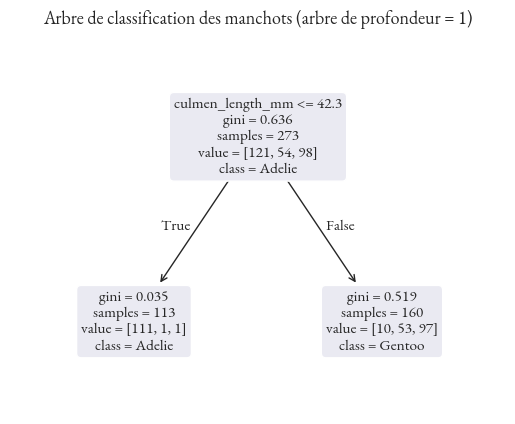

In [39]:
# Paramétrage de la police :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Affichage de l'arbre de décision :
plot_tree(dt, 
          feature_names = X.columns, 
          class_names = y.unique(),
          rounded = True,
          fontsize = 11)

# Ajout du titre au graphique :
plt.title("Arbre de classification des manchots (arbre de profondeur = 1)", 
          fontsize = 13,
          pad = 15)

# Affichage du graphique :
plt.show()

> l'arbre de classification affiché est cohérent avec la partitition graphique des points représentée juste avant.

> Le label retenu pour pour chacune des feuilles de l'arbre est trop restrictif : deux étiquettes sont possibles pour un arbre de profondeur 1 (avec trois étiquettes à affecter). Il aurait fallu choisir un arbre de profondeur supérieure ou égale à 2.

> Ainsi, la valeur seuil de x = 43.25 n'est pas suffisamment précise puisque la partie à droite de cette ligne englobe à la fois les manchots Gentoo mais aussi les manchots Chinstrap.

> Ainsi, si ce modèle fonctionnait selon une logique de prédiction il classerait les manchots Chinstrap et Gentoo dans la catégorie Gentoo et les manchots Adelie dans la catégorie Adelie.

> Il en résulterait que la catégorie des manchots Chinstrap serait ignorée.

### 5. Prédiction de classe pour un nouvel échantillon

In [40]:
# Création de l'échantillon :
test_pingouin = pd.DataFrame({"culmen_length_mm": [35], 
                              "culmen_depth_mm": [17]})
test_pingouin

,culmen_length_mm,culmen_depth_mm
0,35,17


In [41]:
# Prédiction des probabilités pour chaque classe pour cet échantillon :
y_pred_proba = dt.predict_proba(test_pingouin)
y_pred_proba.round(2)

array([[0.98, 0.01, 0.01]])

In [42]:
# Conversion des probabilités en série, en utilisant les classes comme index :
resultats_test_pingouin_1 = pd.DataFrame({"Espèces de manchots": dt.classes_, 
                                          "Probabilité d'appartenance (%)": y_pred_proba[0]*100})
resultats_test_pingouin_1.round(2)

,Espèces de manchots,Probabilité d'appartenance (%)
0,Adelie,98.23
1,Chinstrap,0.88
2,Gentoo,0.88


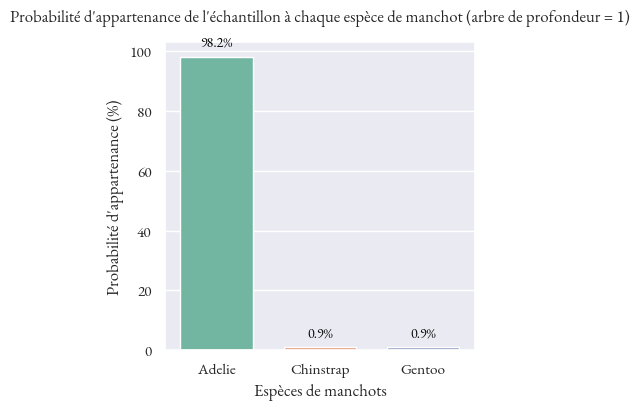

In [43]:
# Création de la figure :
plt.figure(figsize = (4, 4))

# Création du barplot :
barplot = sns.barplot(data = resultats_test_pingouin_1, 
                      x = "Espèces de manchots", 
                      y = "Probabilité d'appartenance (%)",
                      legend = False,
                      hue = "Espèces de manchots",
                      palette = palette,
                      width = 0.7)

# Ajout des pourcentages au-dessus des barres du graphique :
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', 
                     va = 'bottom', 
                     fontsize = 10, 
                     color = 'black', 
                     xytext = (0, 5), 
                     textcoords = 'offset points')

# Ajout d'un titre au graphique :
plt.title("Probabilité d'appartenance de l'échantillon à chaque espèce de manchot (arbre de profondeur = 1)",
          pad = 15,
          fontsize = 12)

# Affichage du graphique : 
plt.show()

> L'échantillon a de très fortes chances d'appartenir à l'espèce de manchots "Adélie" (98%).

> En effet, si la longueur du culmen est inférieure à 43.25 mm, l'abre classe l'individu dans la catégorie de manchots "Adélie".

### 6. Création d'un nouvel arbre de classification (profondeur = 2)

In [44]:
# Instanciation de dt :
dt = DecisionTreeClassifier(max_depth = 2,
                            random_state = SEED)

In [45]:
# Ajustement de dt au set d'entrainement :
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [46]:
# Prédiction des étiquettes de l'ensemble test :
y_pred = dt.predict(X_test)

In [47]:
# Evaluation de l'accuracy du modèle :
accuracy = accuracy_score(y_test, y_pred)
print("L'accuracy obtenue est de ", round(accuracy, 2))

L'accuracy obtenue est de  0.91


> La proportion de prédictions correctes dans l'ensemble de test est donc de 91%.

<Figure size 500x500 with 0 Axes>

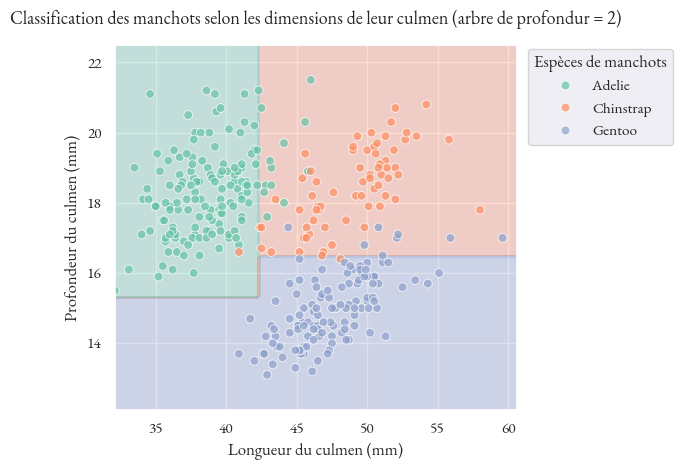

In [48]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Normalisation des couleurs pour correspondre aux classes :
tab10_norm = mpl.colors.Normalize(vmin = 0, 
                                  vmax = 2)

# Création de la palette à partir de Set2 :
palette = sns.color_palette('Set2', 
                            n_colors = 3)

# Affichage des frontières de décision générées par l'arbre de classificiation :
DecisionBoundaryDisplay.from_estimator(dt,
                                       X_train,
                                       response_method = "predict",
                                       cmap = mpl.colors.ListedColormap(palette),
                                       norm = tab10_norm,
                                       alpha = 0.3)

# Création du scatterplot :
sns.scatterplot(data = pingouins_culmen, 
                x = "culmen_length_mm", 
                y = "culmen_depth_mm", 
                hue = "species",
                palette = palette,
                alpha = 0.7,
                s = 40,
                edgecolor = "white",
                linewidth = 0.7)

# Ajout du titre :
plt.title("Classification des manchots selon les dimensions de leur culmen (arbre de profondur = 2)",
          pad = 15,
          fontsize = 13)

# Ajout des étiquettes aux axes des x et des y :
plt.xlabel("Longueur du culmen (mm)")
plt.ylabel("Profondeur du culmen (mm)")

# Modification du titre de la légende :
plt.legend(title = "Espèces de manchots",
           bbox_to_anchor = (1.01, 1.01))

# Affichage du graphique :
plt.tight_layout()
plt.show()

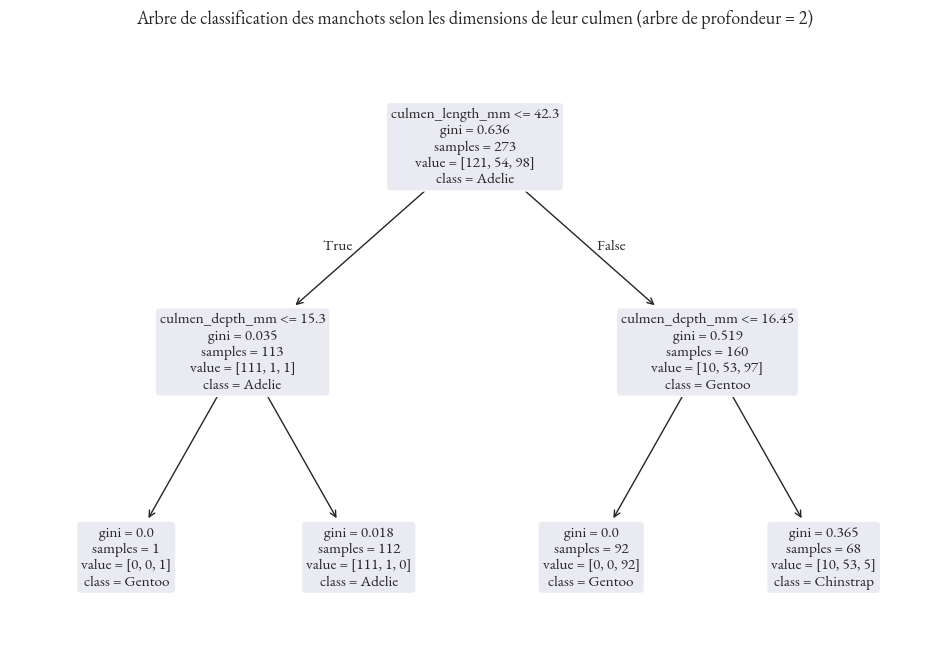

In [49]:
# Création de la figure :
plt.figure(figsize = (12, 8))

# Paramétrage de la police :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création de l'arbre de décision :
plot_tree(dt, 
          feature_names = X.columns, 
          class_names = y.unique(),
          rounded = True,
          fontsize = 11)

# Ajout du titre au graphique :
plt.title("Arbre de classification des manchots selon les dimensions de leur culmen (arbre de profondeur = 2)", 
          fontsize = 13,
          pad = 15)

# Affichage de l'arbre :
plt.show()

In [50]:
# Prédiction des probabilités pour chaque classe pour cet échantillon :
y_pred_proba = dt.predict_proba(test_pingouin)
y_pred_proba.round(2)

array([[0.99, 0.01, 0.  ]])

In [51]:
# Conversion des probabilités en série, en utilisant les classes comme index :
resultats_test_pingouin_1 = pd.DataFrame({"Espèce de manchot": dt.classes_, 
                                          "Probabilité d'appartenance (%)": y_pred_proba[0]*100})
resultats_test_pingouin_1.round(2)

,Espèce de manchot,Probabilité d'appartenance (%)
0,Adelie,99.11
1,Chinstrap,0.89
2,Gentoo,0.00


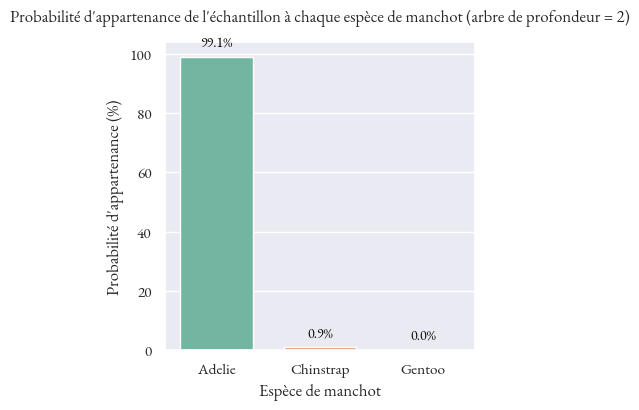

In [52]:
# Création de la figure :
plt.figure(figsize = (4, 4))

# Création du barplot :
barplot = sns.barplot(data = resultats_test_pingouin_1, 
                      x = "Espèce de manchot", 
                      y = "Probabilité d'appartenance (%)",
                      legend = False,
                      hue = "Espèce de manchot",
                      palette = palette,
                      width = 0.7)

# Ajout des pourcentages au-dessus des barres du graphique :
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', 
                     va = 'bottom', 
                     fontsize = 10, 
                     color = 'black', 
                     xytext = (0, 5), 
                     textcoords = 'offset points')

# Ajout d'un titre au graphique :
plt.title("Probabilité d'appartenance de l'échantillon à chaque espèce de manchot (arbre de profondeur = 2)",
          pad = 15,
          fontsize = 12)

# Affichage du graphique : 
plt.show()

> L'échantillon a de très fortes chances d'appartenir à l'espèce de manchots "Adélie" (99%).

> En effet, si la longueur du culmen est inférieure à 42.3 mm et la profondeur du culmen supérieure à 15.3 mm, l'abre classe l'individu dans la catégorie de manchots "Adélie".

# II. PROJET 2 - PREDICTION DU CANCER DU SEIN

## A. METHODE DU HOLD OUT

### 1. Division des données en ensembles d'entrainement et de test

#### a. Import du jeu de données

In [53]:
# Import du jeu de données :
breast_K = pd.read_csv("dataset-b.csv", 
                       sep = ",",
                       encoding = "utf-8",
                       engine = "python",
                       decimal = ",")

In [54]:
# Affichage des premières lignes du dataset pour s'assurer de l'import :
breast_K.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


#### b. Nettoyage des données

In [55]:
# Affichage des informations sur le tableau :
breast_K.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [56]:
# Affichage du nombre de lignes :
print("Nombre de lignes :", breast_K.shape[0])

# Nombre de colonnes
print("Nombre de colonnes :", breast_K.shape[1])

Nombre de lignes : 569
Nombre de colonnes : 33


In [57]:
# Affichage du type de variables :
print(breast_K.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [58]:
# Affichage du contenu de la colonnes 'diagnosis' :
print("Les valeurs prises par la variable 'diagnosis' sont ", breast_K['diagnosis'].unique())

Les valeurs prises par la variable 'diagnosis' sont  ['M' 'B']


In [59]:
# Conversion des données de la variable 'diagnosis' en variables numériques :
breast_K['diagnosis'] = breast_K['diagnosis'].map({'M': 1, 'B': 0})      # La valeur 1 est attribuée à M et la valeur 0 à B.

In [60]:
# Décompte du nombre de doublons :
nb_doublons = breast_K.duplicated().sum()

In [61]:
# Affichage du nombre de doublons :
print(f"Il existe {nb_doublons} doublon(s).")

Il existe 0 doublon(s).


In [62]:
# Repérage des valeurs en double dans la colonne 'id' :
doublons_id = breast_K[breast_K.duplicated(subset = 'id', keep = False)]

# Décompte du nombre de doublons :
nombre_doublons = doublons_id['id'].nunique()
print(f"Il y a {nombre_doublons} doublons dans la colonne 'id'.")

Il y a 0 doublons dans la colonne 'id'.


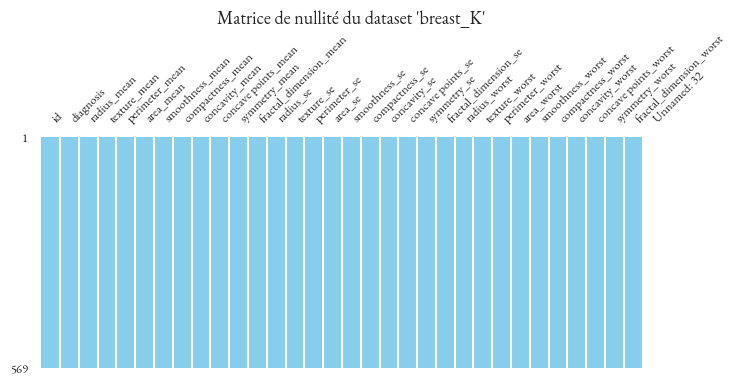

In [63]:
# Affichage de la matrice de nullité :
msno.matrix(breast_K, 
            figsize = (8,3), 
            color = (0.529, 0.808, 0.922), 
            sparkline = False)

# Personnalisation de la figure :
plt.tick_params(axis = 'both', 
                labelsize = 9)
plt.title("Matrice de nullité du dataset 'breast_K'", 
          fontsize = 13)

# Affichage du graphique :
plt.show()

> On peut s'apercevoir que près de 100% des données de la variable 'Unnamed : 32' sont nulles.

In [64]:
# Suppression de la colonne 'Unnamed : 32' :
breast_K = breast_K.drop(columns = ['Unnamed: 32'])

In [65]:
# Affichage des noms de colonnes de breast_K :
print("Noms des colonnes du DataFrame :")
print(breast_K.columns)

Noms des colonnes du DataFrame :
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


> La variable 'Unnamed: 32' a été supprimée.

> 'id' n'est pas une caractéristique à proprement parler, c'est une valeur incrémentale.

In [66]:
# Suppression de la colonne 'id':
breast_K = breast_K.drop(columns = ['id'])

In [67]:
# Affichage des noms de colonnes de breast_K :
print("Noms des colonnes du DataFrame :")
print(breast_K.columns)

Noms des colonnes du DataFrame :
Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


> La variable 'id' a disparu.

In [68]:
# Affichage de la description du tableau :
breast_K.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### c. Analyse des variables

> id : Numéro d'identification du patient

> diagnosis : diagnostic des tissus mammaires (M = malin, B = bénin)

> radius_mean : moyenne des distances du centre aux points sur le périmètre de la tumeur

> texture_mean : écart type des valeurs de niveau de gris des pixels de l'image, mesurant la variation de texture

> perimeter_mean : périmètre moyen de la tumeur, mesurant la taille du contour

> area_mean : surface moyenne de la tumeur (en pixels)

> smoothness_mean : moyenne de la variation locale des longueurs de rayon, indiquant la régularité des contours (plus faible = contours plus réguliers)

> compactness_mean : moyenne du (périmètre^2 / surface - 1,0), mesurant la compacité de la tumeur.

> concavity_mean : moyenne de la gravité des parties concaves du contour (parties rentrantes)

> concave points_mean : moyenne du nombre de points concaves sur le contour de la tumeur

> symmetry_mean : moyenne de la symétrie du contour de la tumeur (valeur faible = plus symétrique)

> fractal_dimension_mean : moyenne de la "dimension fractale", qui mesure la complexité du contour, en fonction de l'"approximation du la courbure.

> radius_se : erreur standard de la moyenne des distances du centre aux points sur le périmètre

> texture_se : erreur type pour l'écart-type des valeurs en niveaux de gris

> perimeter_se : erreur standard du périmètre moyen.

> area_se : erreur standard de la surface moyenne.

> smoothness_se : erreur standard de la variation locale des longueurs de rayon.

> compactness_se : erreur standard pour (perimeter^2 / zone - 1.0)

> concavity_se : erreur standard de la gravité des parties concaves du contour.

> concave points_se : erreur standard du nombre de points concaves sur le contour.

> symmetry_se : erreur standard de la symétrie du contour.

> fractal_dimension_se : erreur standard de la dimension fractale, mesurant la variabilité de la complexité du contour.

> radius_worst : plus grande valeur observée pour la distance moyenne du centre aux points sur le périmètre.

> texture_worst : plus grande valeur observée de l'écart type des valeurs de niveaux de gris.

> perimeter_worst : plus grande valeur observée du périmètre

> area_worst : plus grande valeur observée de la surface

> smoothness_worst : plus grande valeur observée de la variation locale des longueurs de rayon

> compactness_worst : plus grande valeur moyenne pour (périmètre^2 / surface - 1,0)

> concavity_worst : plus grande valeur moyenne pour la gravité des parties concaves du contour

> concave points_worst : plus grande valeur moyenne pour le nombre de parties concaves du contour

> symmetry_worst : plus grande valeur observée de la symétrie du contour.

> fractal_dimension_worst : plus grande valeur observée de la dimension fractale, mesurant la complexité maximale du contour.

> Variables qualitatives nominales : diagnosis

> Variables quantitatives continues : radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, concave points_mean

In [69]:
# Décompte du nombre d'échantillons :
classes_nb = breast_K['diagnosis'].value_counts()

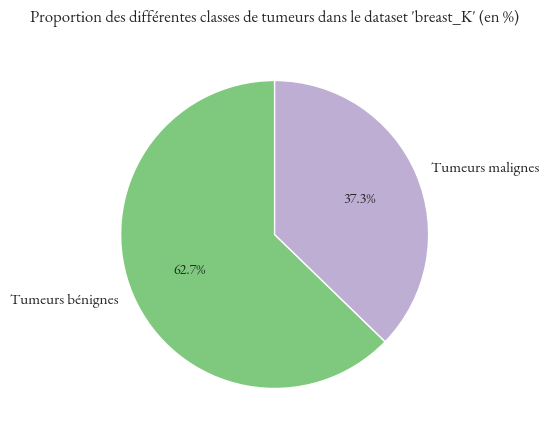

In [70]:
# Dictionnaire pour remplacer '1' par 'malin' et '0' par 'bénin'
label_replacement = {1: 'Tumeurs malignes', 0: 'Tumeurs bénignes'}      # Visualisation des proportions des différents targets

# Création de la figure :
plt.figure(figsize = (5, 5))

# Création du pie chart :
plt.pie(classes_nb, 
        labels = [label_replacement.get(i, i) for i in classes_nb.index],
        autopct = '%1.1f%%',
        startangle = 90,
        colors = plt.get_cmap('Accent').colors)

# Ajout du titre :
plt.title("Proportion des différentes classes de tumeurs dans le dataset 'breast_K' (en %)",
          fontsize = 12,
          pad = 15)

# Affichage du graphique :
plt.show()

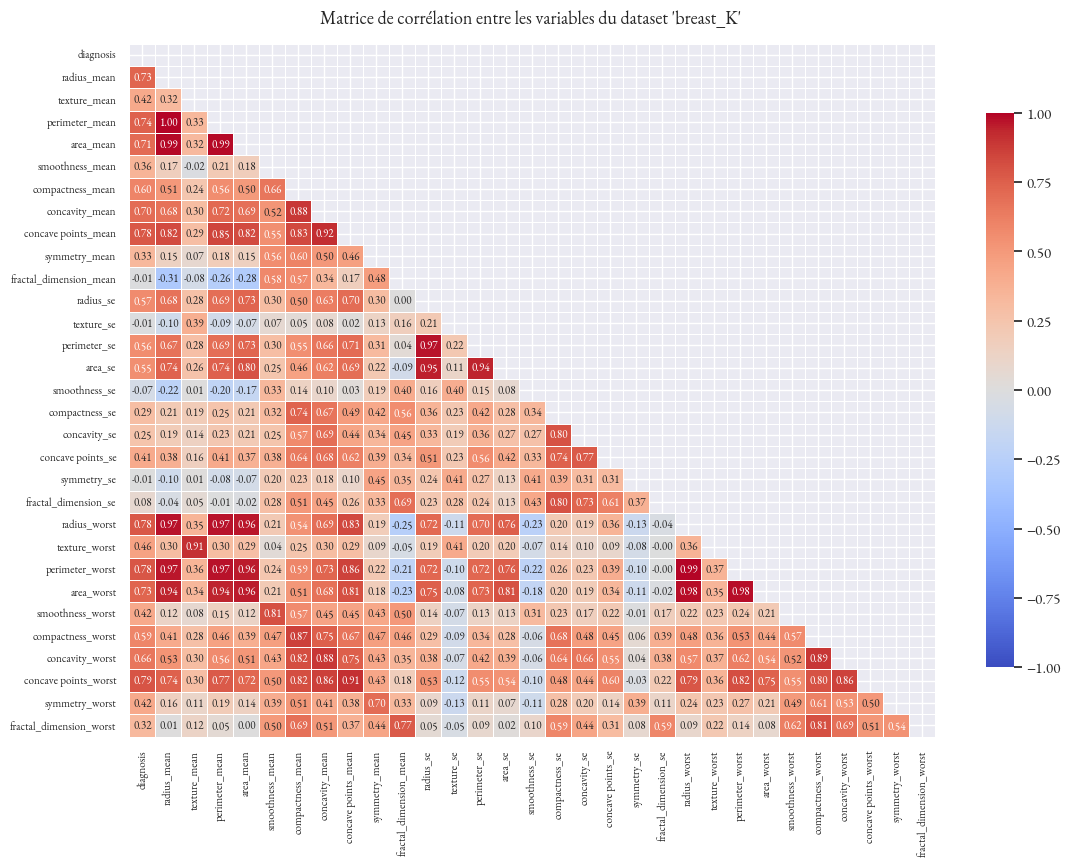

In [71]:
# Calcul de la matrice de corrélation entre les variables :
correlation_matrix = breast_K.corr()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 8

# Création de la figure :
plt.figure(figsize = (13, 9))

# Création d'un masque pour masquer la moitié supérieure de la matrice :
mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))

# Affichage de la matrice de corrélation : 
sns.heatmap(correlation_matrix, 
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, 
            vmax = 1,
            linewidths = 0.5,
            fmt = '.2f',
            cbar_kws = {'shrink': 0.8},
            mask = mask)

# Ajout d'un titre au graphique :
plt.title("Matrice de corrélation entre les variables du dataset 'breast_K' ", 
          fontsize = 13,
          pad = 15)

# Personnalisation des axes :
plt.xticks(fontsize = 8, 
           rotation = 90)
plt.yticks(fontsize = 8, 
           rotation = 0)

# Affichage du graphique :
plt.show()

> Les variables ayant une corrélation supérieure ou égale à 0.95 seront suprimées pour éviter le phénomène de colinéarité.

In [72]:
# Suppression des variables créant de la colinéarité :
breast_K = breast_K.drop(columns = ['area_mean', 
                                    'perimeter_mean', 
                                    'radius_worst', 
                                    'perimeter_worst', 
                                    'radius_se'])

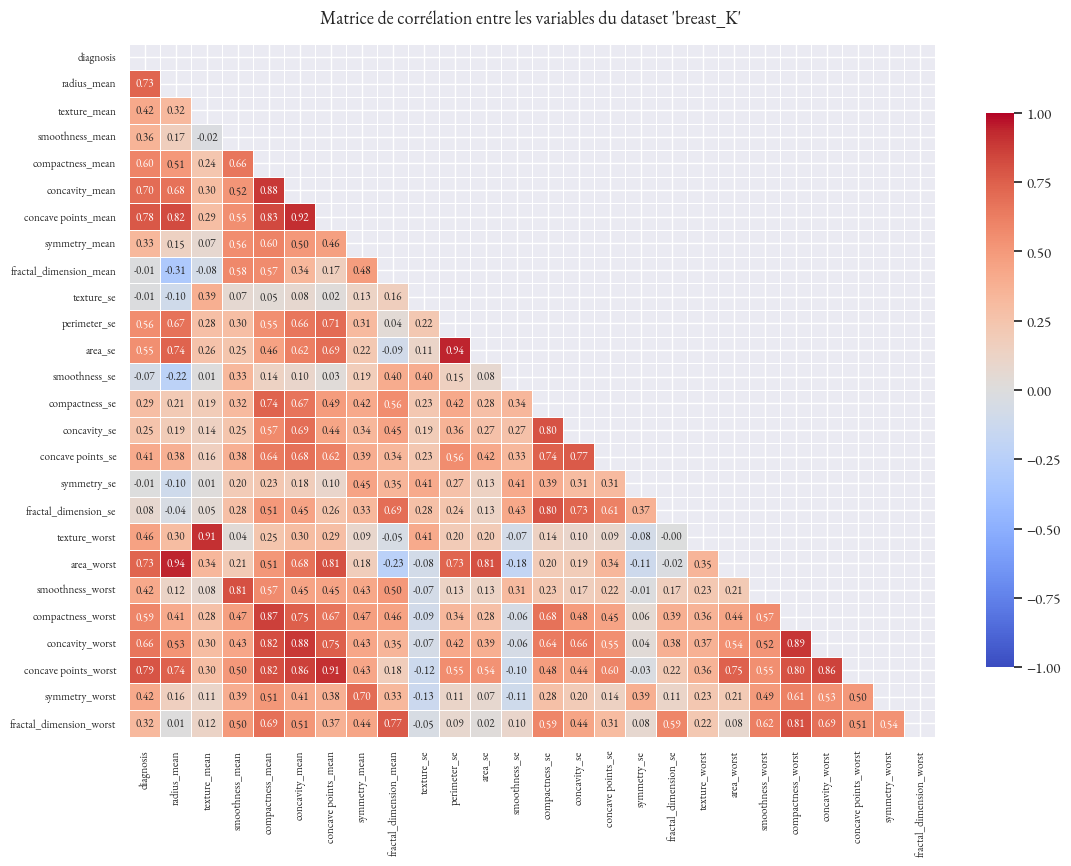

In [73]:
# Calcul de la matrice de corrélation entre les variables :
correlation_matrix = breast_K.corr()

# Création de la figure :
plt.figure(figsize = (13, 9))

# Création d'un masque pour masquer la moitié supérieure de la matrice
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Affichage de la matrice de corrélation
sns.heatmap(correlation_matrix, 
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, 
            vmax = 1,
            linewidths = 0.5,
            fmt = '.2f',
            cbar_kws = {'shrink': 0.8},
            mask = mask)

# Ajout d'un titre au graphique :
plt.title("Matrice de corrélation entre les variables du dataset 'breast_K' ", 
          fontsize = 13,
          pad = 15)

# Personnalisation des axes :
plt.xticks(fontsize = 8, 
           rotation = 90)
plt.yticks(fontsize = 8, 
           rotation = 0)

# Affichage du graphique :
plt.show()

In [74]:
# Sélection des colonnes concernées :
colonnes_cibles = breast_K.columns.drop('diagnosis')

# Calcul des quartiles Q1 et Q3 pour chaque colonne ciblée :
Q1 = breast_K[colonnes_cibles].quantile(0.25)
Q3 = breast_K[colonnes_cibles].quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers pour chaque colonne ciblée :
outliers = (breast_K[colonnes_cibles] < (Q1 - 1.5 * IQR)) | (breast_K[colonnes_cibles] > (Q3 + 1.5 * IQR))

# Comptage des outliers pour chaque colonne :
outliers_summary = outliers.sum()

# Tri par ordre décroissant des colonnes avec le plus grand nombre d'outliers :
outliers_sorted = outliers_summary.sort_values(ascending=False)

# Calcul du nombre total de lignes du DataFrame :
total_rows = breast_K.shape[0]

# Calcul des proportions d'outliers pour chaque colonne :
outliers_proportion = (outliers_summary / total_rows) * 100

# Tri des proportions d'outliers par ordre décroissant :
outliers_proportion_sorted = outliers_proportion.sort_values(ascending=False)

# Affichage des proportions d'outliers par variable en pourcentage :
print("\nProportions d'outliers par variable (%) :\n")
print(outliers_proportion_sorted.round(2))


Proportions d'outliers par variable (%) :

area_se                    11.42
perimeter_se                6.68
area_worst                  6.15
smoothness_se               5.27
compactness_se              4.92
fractal_dimension_se        4.92
symmetry_se                 4.75
fractal_dimension_worst     4.22
symmetry_worst              4.04
concavity_se                3.87
texture_se                  3.51
concave points_se           3.34
concavity_mean              3.16
compactness_worst           2.81
compactness_mean            2.81
fractal_dimension_mean      2.64
symmetry_mean               2.64
radius_mean                 2.46
concavity_worst             2.11
concave points_mean         1.76
texture_mean                1.23
smoothness_worst            1.23
smoothness_mean             1.05
texture_worst               0.88
concave points_worst        0.00
dtype: float64


> Le nombre d'outliers de la variable 'area_se' mérite une analyse plus approfondie.

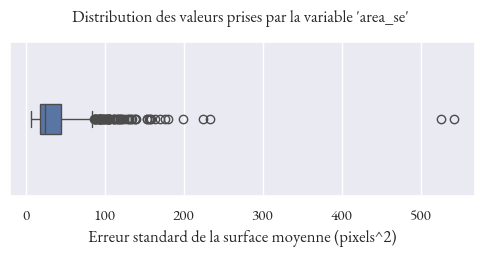

In [75]:
# Création d'une nouvelle figure :
plt.figure(figsize = (6, 2))

# Affichage du boxplot de la variable 'area_se' :
sns.boxplot(x = breast_K['area_se'],
            width = 0.2)

# Ajout d'un titre à la figure :
plt.title("Distribution des valeurs prises par la variable 'area_se' ", 
          fontsize = 12, 
          pad = 15)

# Personnalisation de l'axe des x : 
plt.xlabel('Erreur standard de la surface moyenne (pixels^2)')

# Affichage de la figure :
plt.show()

> Deux valeurs paraissent particulièrement élevées, il sera nécessaire de les supprimer pour retomber sur un taux d'outliers acceptable.

In [76]:
# Suppression des lignes contenant des valeurs supérieures à 500 :
breast_K = breast_K[breast_K['area_se'] <= 500]

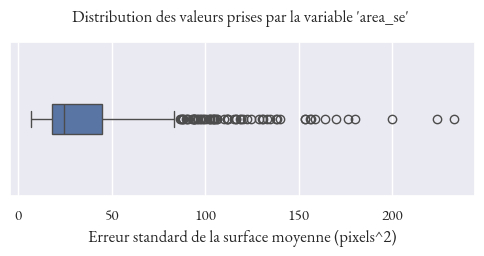

In [77]:
# Création d'une nouvelle figure :
plt.figure(figsize = (6, 2))

# Affichage du boxplot de la variable 'area_se' :
sns.boxplot(x = breast_K['area_se'],
            width = 0.2)

# Ajout d'un titre à la figure :
plt.title("Distribution des valeurs prises par la variable 'area_se' ", 
          fontsize = 12, 
          pad = 15)

# Personnalisation de l'axe des x : 
plt.xlabel('Erreur standard de la surface moyenne (pixels^2)')

# Affichage de la figure :
plt.show()

In [78]:
# Sélection des colonnes concernées :
colonnes_cibles = ['area_se']

# Calcul des quartiles Q1 et Q3 pour chaque colonne ciblée :
Q1 = breast_K[colonnes_cibles].quantile(0.25)
Q3 = breast_K[colonnes_cibles].quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers pour chaque colonne ciblée :
outliers = (breast_K[colonnes_cibles] < (Q1 - 1.5 * IQR)) | (breast_K[colonnes_cibles] > (Q3 + 1.5 * IQR))

# Comptage des outliers pour chaque colonne :
outliers_summary = outliers.sum()

# Tri par ordre décroissant des colonnes avec le plus grand nombre d'outliers :
outliers_sorted = outliers_summary.sort_values(ascending=False)

# Calcul du nombre total de lignes du DataFrame :
total_rows = breast_K.shape[0]

# Calcul des proportions d'outliers pour chaque colonne :
outliers_proportion = (outliers_summary / total_rows) * 100

# Tri des proportions d'outliers par ordre décroissant :
outliers_proportion_sorted = outliers_proportion.sort_values(ascending=False)

# Affichage des proportions d'outliers par variable en pourcentage :
print("\nProportions d'outliers par variable (%) :\n") 
print(outliers_proportion_sorted.round(2))


Proportions d'outliers par variable (%) :

area_se    11.11
dtype: float64


> Le taux d'outliers de la variable 'area_se' reste trop élevé, la variable sera supprimée du dataset.

In [79]:
# Suppression de la variable 'area_se' :
breast_K = breast_K.drop('area_se', axis = 1)

In [80]:
# Affichage du DataFrame après suppression :
print("Après nettoyage des données, les variables restantes sont :")
print(breast_K.columns)

Après nettoyage des données, les variables restantes sont :
Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'perimeter_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


#### d. Séparation des caractéristiques et de leurs étiquettes

In [81]:
# Sélection des colonnes 'diagnosis', 'radius_mean', 'concave points_mean' :
breast_cancer = breast_K[['diagnosis', 
                          'radius_mean', 
                          'concave points_mean']].copy()

In [82]:
# Affichage des premières lignes de breast_cancer :
breast_cancer.head(3)

,diagnosis,radius_mean,concave points_mean
0,1,17.99,0.14710
1,1,20.57,0.07017
2,1,19.69,0.12790


In [83]:
# Sélection des caractéristiques (features) et de l'étiquette (label) :
X = breast_cancer[['radius_mean', 'concave points_mean']]
y = breast_cancer['diagnosis']

# Affichage du type de l'objet X :
print("L'objet X se présente ainsi : ", type(X))

# Affichage des 3 premières lignes de X :
X.head(3)

L'objet X se présente ainsi :  <class 'pandas.core.frame.DataFrame'>


,radius_mean,concave points_mean
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790


In [84]:
# Afichage du type de l'objet y :
print("L'objet 'y' se présente ainsi :", type(y))

# Affichage des 3 premières lignes de y :
y.head(3)

L'objet 'y' se présente ainsi : <class 'pandas.core.series.Series'>


0    1
1    1
2    1
Name: diagnosis, dtype: int64

#### e. division du jeu de données en ensembles d'entrainement et de test :

In [85]:
# Division du dataset en ensembles train et test :
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,   # 20% test
                                                    stratify = y,
                                                    random_state = 1)

### 2. Import du modèle de classification

Pour plus de détails, voir la section [I.1.a. Préparation des données](#preparation-des-donnees)

### 3. Instanciation d’un arbre de décision (profondeur = 6)

In [86]:
# Instanciation de dt :
dt = DecisionTreeClassifier(max_depth = 6,
                            random_state = 1)

### 4. Entraînement du modèle sur les données d'entrainement

In [87]:
# Ajustement de dt au set d'entrainement :
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


<a id="prediction"></a>
### 5. Prédiction et affichage des résultats sur les données de test

In [88]:
# Prédiction des étiquettes de l'ensemble test :
y_pred = dt.predict(X_test)

In [89]:
# Mapping des résultats pour les afficher comme 'bénin' ou 'malin' :
resultats = pd.DataFrame({'Valeur réelle': y_test.iloc[:5].replace({0: 'bénin', 1: 'malin'}).values,
                          'Valeur prédite': pd.Series(y_pred[:5]).replace({0: 'bénin', 1: 'malin'})})
resultats

,Valeur réelle,Valeur prédite
0,malin,malin
1,bénin,bénin
2,bénin,bénin
3,malin,malin
4,bénin,malin


### 6. Visualisation de l'arbre de classification

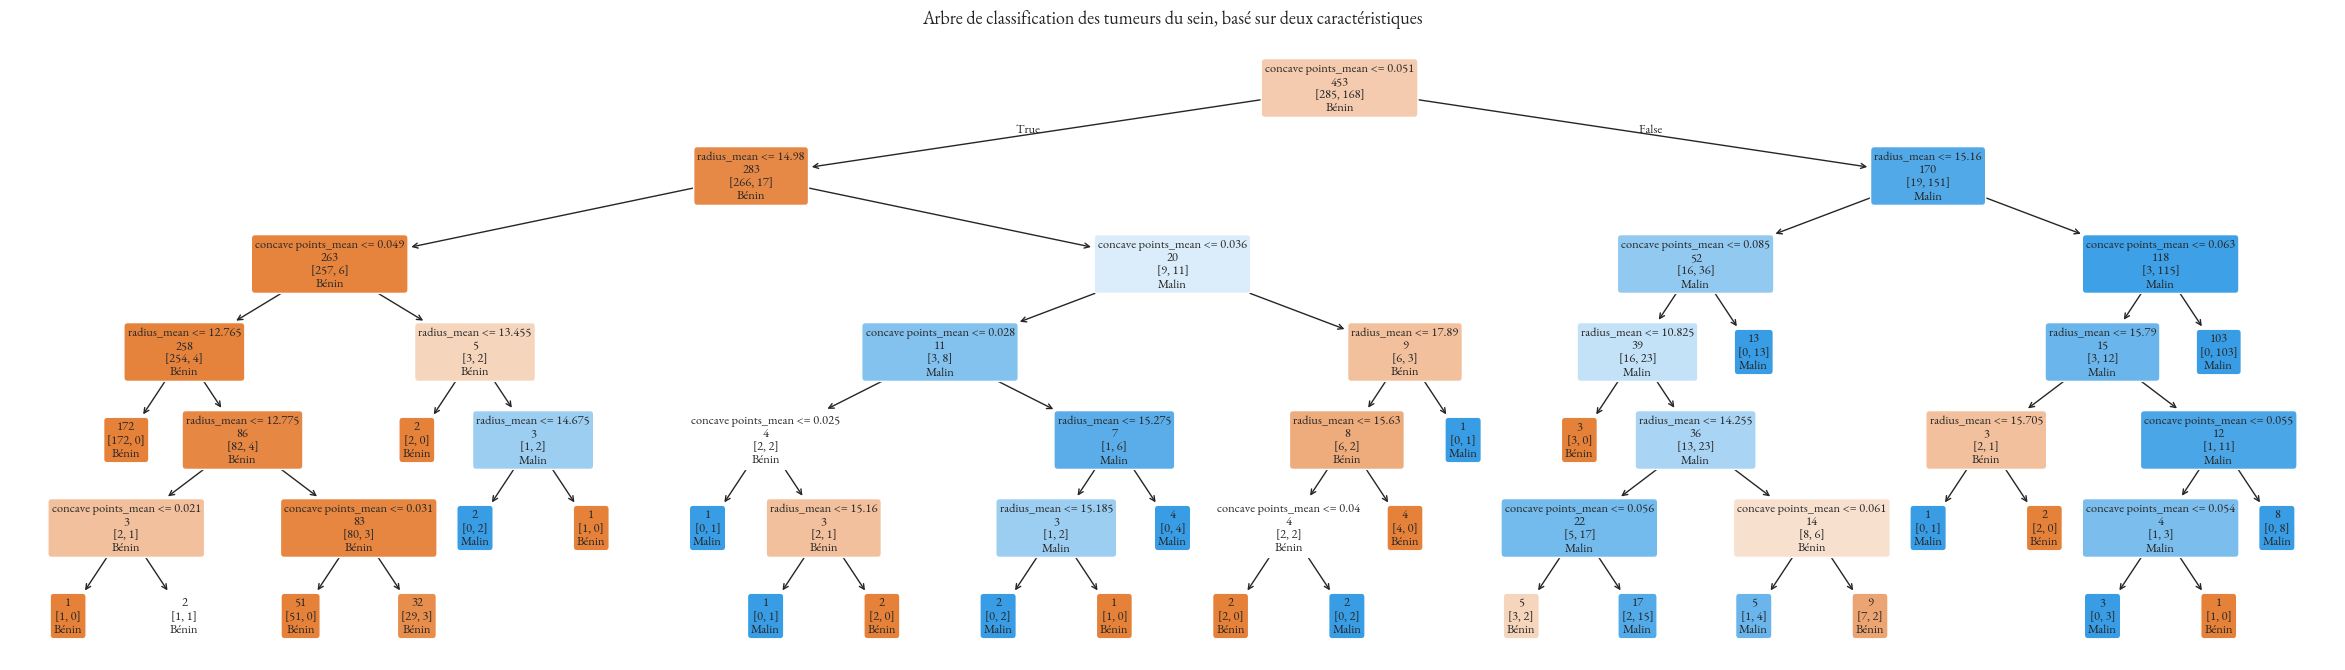

In [90]:
# Paramétrage de la police :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création de la figure :
plt.figure(figsize = (30, 8))

# Affichage de l'arbre de décision :
plot_tree(dt,
          feature_names = X.columns, 
          class_names = ['Bénin', 'Malin'],
          filled = True,
          rounded = True,
          fontsize = 9,
          proportion = False,
          impurity = False,
          label = 'none')

# Ajout du titre au graphique :
plt.title("Arbre de classification des tumeurs du sein, basé sur deux caractéristiques", 
          fontsize = 13,
          pad = 15)

# Affichage du graphique :
plt.show()

### 7. Analyse des limites de la méthode Hold-Out

> La méthode du hold out pose les problèmes suivants :
> - variation dans les estimations en fonction du découpage de l'échantillon d'entrainement
> - forte sensibilité aux outliers
> - manque de robustesse puisque l'entrainement se base sur une seule partie des données.

> Cela peut contribuer à un manque de performance globale du modèle.

## B. CHOIX DU CRITERE D'INFORMATION

### 1. Importation de la fonction d’évaluation (Accuracy Score)

> Pour plus de détails, voir la section [I.1.a. Préparation des données](#preparation-des-donnees)

### 2. Prédiction des labels à partir du jeu de test

> Pour plus de détails, voir la section [II.A.5. Prédiction et affichage des résultats sur les données de test](#prediction)

### 3. Affichage de l’accuracy score du modèle

In [91]:
# Evaluation de l'accuracy du modèle :
accuracy = accuracy_score(y_test, y_pred)
print("L'accuracy score obtenu est de ", round(accuracy, 2))

L'accuracy score obtenu est de  0.89


> La proportion de prédictions correctes dans l'ensemble de test est donc de 89%.

### 4. Construction de 2 arbres basés sur l'entropie et sur l'indice de Gini, et sur l'ensemble des caractéristiques du dataset

#### a. Préparation des données

In [92]:
# Sélection des caractéristiques :
X = breast_K.drop('diagnosis', axis=1)

# Sélection de l'étiquette :
y = breast_K['diagnosis']

# Affichage du type de l'objet X pour vérifier qu'il s'agit d'un DataFrame :
print("L'objet X se présente ainsi : ", type(X))

# Affichage des 3 premières lignes de X pour visualiser les caractéristiques extraites :
X.head(3)

L'objet X se présente ainsi :  <class 'pandas.core.frame.DataFrame'>


,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0.9053,8.589,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.7339,3.398,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7869,4.585,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [93]:
# Affichage du type de l'objet 'y' :
print("L'objet 'y' se présente ainsi :", type(y))

# Affichage des 3 premières valeurs de la colonne 'y' :
y.head(3)

L'objet 'y' se présente ainsi : <class 'pandas.core.series.Series'>


0    1
1    1
2    1
Name: diagnosis, dtype: int64

In [94]:
# Division du dataset en ensembles train et test :
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2,   # 20% test
                                                    stratify = y,
                                                    random_state = 1)

#### b. Arbre basé sur l'entropie

In [95]:
# Instanciation de dt_entropie :
dt_entropie = DecisionTreeClassifier(criterion = 'entropy',
                                     max_depth = 6,
                                     random_state = 1)

In [96]:
# Ajustement de dt au set d'entrainement :
dt_entropie.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [97]:
# Prédiction des étiquettes de l'ensemble test :
y_pred_entropie = dt_entropie.predict(X_test)

#### c. Arbre basé sur l'indice de Gini

In [98]:
# Instanciation de dt :
dt_gini = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = 6,
                                 random_state = 1)

In [99]:
# Ajustement de dt au set d'entrainement :
dt_gini.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,1
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [100]:
# Prédiction des étiquettes de l'ensemble test :
y_pred_gini = dt_gini.predict(X_test)

### 5. Analyse des différences entre entropie et indice de Gini

> L'entropie mesure le degré d'incertitude dans un ensemble de données. Si l'entropie est faible, l'ensemble est plus homogène.

> L'indice de Gini quantifie également l'impureté mais d'une manière différente. Un indice de Gini plus faible signifie que l'ensemble est plus pur, c'est-à-dire que la classe dominante est plus présente.

> En résumé :
> - L'indice de Gini mesure l'impureté d'un ensemble.
> - L'entropie mesure l'incertitude d'un ensemble.

### 6. Visualisation des arbres de classification

#### a. Arbre basé sur l'entropie

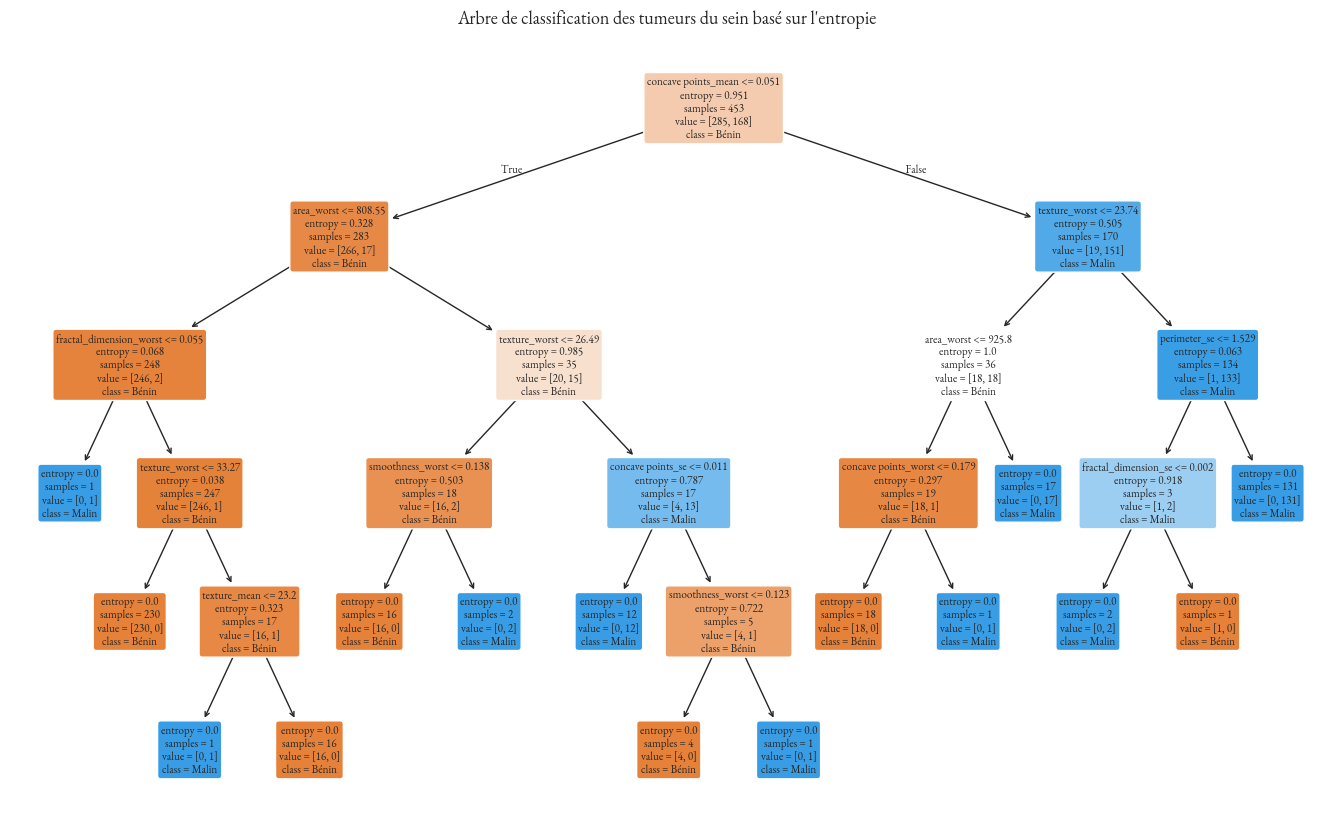

In [101]:
# Paramétrage de la police :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création de la figure :
plt.figure(figsize = (17, 10))

# Affichage de l'arbre de décision :
plot_tree(dt_entropie,
          feature_names = X.columns,
          class_names = ['Bénin', 'Malin'],
          rounded = True,
          fontsize = 8,
          filled = True)

# Ajout du titre au graphique :
plt.title("Arbre de classification des tumeurs du sein basé sur l'entropie ", 
          fontsize = 13,
          pad = 15)

# Affichage du graphique :
plt.show()

#### b. Arbre basé sur l'indice de Gini

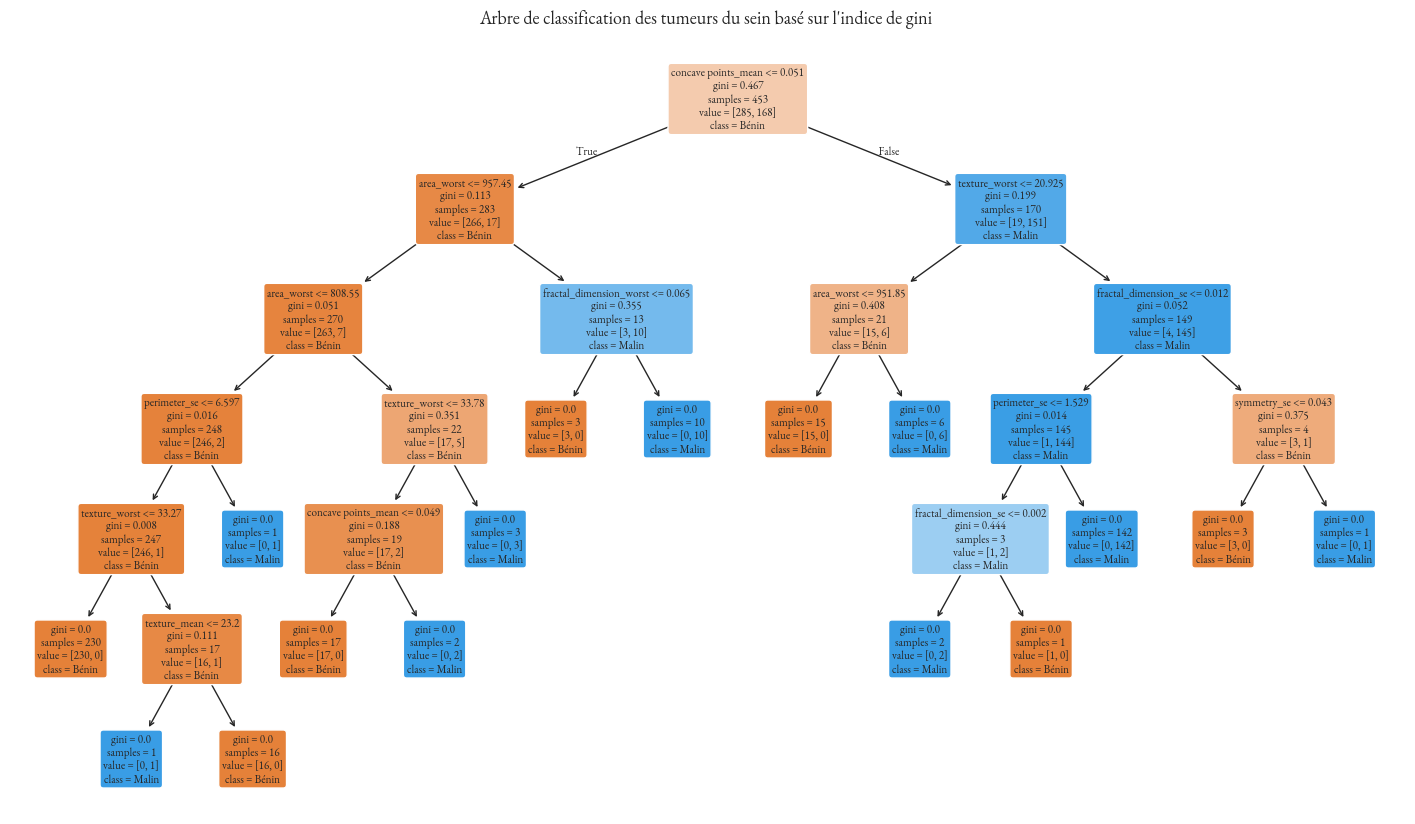

In [102]:
# Paramétrage de la police :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création de la figure :
plt.figure(figsize = (18, 10))

# Affichage de l'arbre de décision :
plot_tree(dt_gini, 
          feature_names = X.columns, 
          class_names = ['Bénin', 'Malin'],
          rounded = True,
          fontsize = 8,
          filled = True)

# Ajout du titre au graphique :
plt.title("Arbre de classification des tumeurs du sein basé sur l'indice de gini ", 
          fontsize = 13,
          pad = 15)

# Affichage du graphique :
plt.show()

### 7. Comparaison des performances des 2 approches

In [103]:
# Evaluation de l'accuracy du modèle basé sur l'entropie :
accuracy_entropie = accuracy_score(y_test, y_pred_entropie)
print("L'accuracy score du modèle basé sur l'entropie est de ", round(accuracy_entropie, 2))

L'accuracy score du modèle basé sur l'entropie est de  0.9


In [104]:
# Evaluation de l'accuracy du modèle basé sur l'indice de gini :
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("L'accuracy score du modèle basé sur l'entropie est de ", round(accuracy_gini, 2))

L'accuracy score du modèle basé sur l'entropie est de  0.9


> L'accuracy score est similaire entre les deux modèles.

> La proportion de prédictions correctes dans l'ensemble de test est donc de 93%.

## C. METRIQUES DE PERFORMANCE

> Le modèle basé sur le critère "entropie" sera retenu pour la suite des étapes.

### 0. Calcul des métriques de performance

> Les valeurs prédites sont notées ŷ tandis que les valeurs réelles sont notées y dans le contexte d'une classification binaire.
> La valeur 0 correspond à l'absence de la classe-cible.
> - ŷ = 1 et y = 1 : Vrais positifs (VP)
> - ŷ = 0 et y = 0 : Vrais négatifs (VN)
> - ŷ = 1 et y = 0 : Faux positifs (FP)
> - ŷ = 0 et y = 1 : Faux négatifs (FN)

> Il en découle que :
> - VP (Vrais positifs) et VN (Vrais négatifs) représentent les prédictions correctes.
> - FP (Faux positifs) et FN (Faux négatifs) représentent les prédictions incorrectes.

#### a. Exactitude (accuracy)

> - Définition : proportion de prédictions correctes (vrais) d'un modèle.
> - Formule : VP + VN / (VP + VN + FP + FN)
> - Avantages : simplicité d'utilisation et rapidité de compréhension.
> - Inconvénients : moins performant sur des classes déséquilibrées, risque de sous-apprentissage.

In [105]:
# Calcul de l'accuracy :
accuracy = accuracy_score(y_test, y_pred_entropie)

In [106]:
# Affichage de l'accuracy :
print(f"L'accuracy du modèle d'arbre de décision est : {accuracy:.2f}")
print(f"{accuracy * 100:.1f} % des classes ont été correctement prédites par le modèle.")

L'accuracy du modèle d'arbre de décision est : 0.90
90.4 % des classes ont été correctement prédites par le modèle.


#### b. Rappel (Recall)

> - Définition : proportion de cas positifs (y =1) correctement identifiés par le modèle.
> - Formule : VP / (VP + FN).
> - Avantages : mesure la performance d'un modèle dans la détection des classes positives, utile dans des cas de déséquilibre de classes.
> - Inconvénients : ne prend pas en compte les faux positifs, peut inciter à un modèle qui prédit trop de positifs.

In [107]:
# Calcul du rappel :
recall = recall_score(y_test, y_pred_entropie, average = 'macro')  

In [108]:
# Affichage du rappel :
print(f"Le rappel du modèle d'arbre de décision est : {recall:.2f}")
print(f"{recall * 100:.1f} % des cas positifs rééls ont été correctement identifiés par le modèle.")

Le rappel du modèle d'arbre de décision est : 0.90
90.4 % des cas positifs rééls ont été correctement identifiés par le modèle.


#### c. Précision

> - Définition : proportion de prédictions positives correctes parmi toutes les prédictions positives faites par le modèle.
> - Formule : VP / (VP + FP)
> - Avantages : particulièrement importante lorsqu'il est crucial de minimiser les faux positifs, permet d’évaluer la qualité des prédictions positives, pertinente dans certains cas de données déséquilibrées. 
> - Inconvénients : ignorance des faux négatifs, non représentative de la performance globale du modèle, peut être trompeuse dans certains cas de données très déséquilibrées.

In [109]:
# Calcul de la matrice de confusion :
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_entropie).ravel()

In [110]:
# Calcul de la précision :
precision_dt = tp / (tp + fp)

In [111]:
# Affichage de la précision :
print(f"La précision du modèle d'arbre de décision est : {precision_dt:.2f}")
print(f"{precision_dt * 100:.1f} % des cas positifs prédits étaient corrects.")

La précision du modèle d'arbre de décision est : 0.84
84.4 % des cas positifs prédits étaient corrects.


#### d. Sensibilité

> Equivalente au rappel sur de la classification binaire.

#### e. Spécificité

> - Définition : proportion de prédictions négatives correctes (y' = 0) parmi toutes les véritables instances négatives identifiées par le modèle (y = 0). 
> - Formule : VN / (VN + FP). 
> - Avantages : permet d’évaluer la performance d’un modèle, en particulier dans les cas où les classes sont déséquilibrées, utile pour minimiser les faux positifs.
> - Inconvénients : ne tient pas compte des faux négatifs, peut induire en erreur si elle est utilisée seule.

In [112]:
# Calcul de la matrice de confusion :
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_entropie).ravel()

In [113]:
# Calcul de la spécificité :
specificity = tn / (tn + fp)

In [114]:
# Affichage de la spécificité :
print(f"La spécificité du modèle d'arbre de décision est : {specificity:.2f}")
print(f"{specificity * 100:.1f} % des cas négatifs ont été correctement identifiés par le modèle.")

La spécificité du modèle d'arbre de décision est : 0.90
90.3 % des cas négatifs ont été correctement identifiés par le modèle.


#### f. F1-Score

> - Définition : combine à la fois la précision et le rappel pour évaluer la performance du modèle"
> - Formule : 2 x précision x rappel / (précision + rappel)
> - Avantages : utile pour évaluer des modèles sur des jeux de données déséquilibrés, permet de mieux comprendre la performance d'un modèle lorsque les erreurs de classification ont des coûts différents
> - Inconvénients : peut être difficile à interpréter seul, ne prend pas en compte le vrai négatif

In [115]:
# Calcul du F1-score :
f1_score = f1_score(y_test, 
                    y_pred_entropie, 
                    average = 'weighted')

In [116]:
# Affichage du F1 score :
print(f"Le F1 score du modèle d'arbre de décision est : {f1_score:.2f}")
print(f"Un score proche de 1 cela reflète une performance solide du modèle dans la prédiction des instances, avec peu de faux positifs et de faux négatifs.")

Le F1 score du modèle d'arbre de décision est : 0.90
Un score proche de 1 cela reflète une performance solide du modèle dans la prédiction des instances, avec peu de faux positifs et de faux négatifs.


#### g. AUC

> - Définition : mesure la capacité d'un modèle à classer correctement les instances positives et négatives
> - Formule : pour chaque prédiction (ŷ) on calcule deux valeurs :
>   - Taux de vrais positifs (TPR) = VP / (VP + FN)
>   - Taux de faux positifs (FPR) = FP / (FP + VN)
> Il s'agit ensuite de représenter chaque valeur prédite (ŷ) avec en abscisse le FPR (=1 - spécificité) et en ordonnées le TPR (=sensibilité). L'AUC est égal à l'aire sous la courbe représentée.
> - Avantages : évalue la performance globale du modèle sur tous les seuils de classification possibles, permet de comparer facilement plusieurs modèles de classification 
> - Inconvénients : Interprétation parfois difficile, peut être trompeuse en présence de classes déséquilibrées 
> Pour le calcul de l'AUC, voir en suivant.

In [117]:
# Affichage du résumé des métriques de performance :
print("\nRapport de classification:\n")
print(classification_report(y_test, 
                            y_pred_entropie, 
                            target_names = ['Bénin', 'Malin']))


Rapport de classification:

              precision    recall  f1-score   support

       Bénin       0.94      0.90      0.92        72
       Malin       0.84      0.90      0.87        42

    accuracy                           0.90       114
   macro avg       0.89      0.90      0.90       114
weighted avg       0.91      0.90      0.90       114



> Pour la valeur obtenue, voir la section [II.C.2. Visualisation et analyse de la courbe ROC et de l’AUC](#AUC)

### 1. Visualisation de la matrice de confusion du modèle

In [118]:
# Calcul de la matrice de confusion :
conf_matrix = confusion_matrix(y_test, y_pred_entropie)

In [119]:
# Calcul des pourcentages :
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

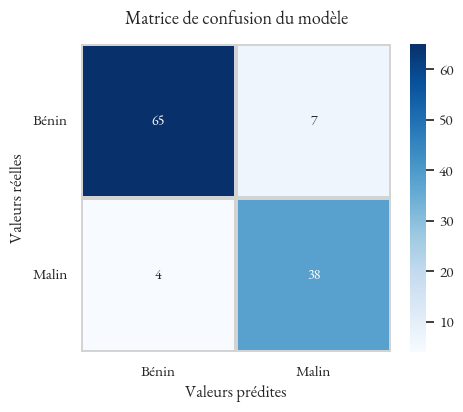

In [120]:
# Configuration de la taille de la figure :
plt.figure(figsize = (5, 4))

# Affichage de la matrice de confusion avec des bordures :
sns.heatmap(conf_matrix, 
            annot = True, 
            fmt = 'd', 
            cmap = 'Blues', 
            linewidths = 1.5,
            linecolor = 'lightgrey',
            xticklabels = ['Bénin', 'Malin'],
            yticklabels = ['Bénin', 'Malin'], 
            cbar = True)

# Configuration du titre :
plt.title("Matrice de confusion du modèle",
          pad = 15,
          fontsize = 13)

# Ajout des titres aux axes des x et y :
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")

# Rotation des étiquettes de l'axe des y :
plt.yticks(rotation = 0)

# Affichage du graphique :
plt.show()

> Les prédictions justes se retrouvent sur la diagonale qui part d'en haut à gauche vers en bas à doite.

<a id="AUC"></a>
### 2. Visualisation et analyse de la courbe ROC et de l’AUC

In [121]:
# Calcul des probabilités prédites :
y_scores = dt_entropie.predict_proba(X_test)[:, 1]

In [122]:
# Calcul des valeurs FPR, TPR et des seuils :
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [123]:
# Calcul de l'AUC (aire sous la courbe) :
roc_auc = auc(fpr, tpr)

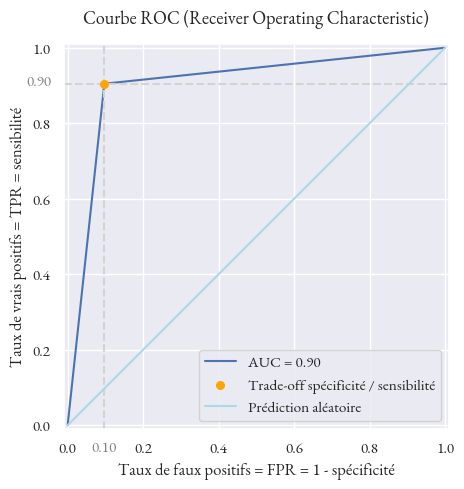

In [124]:
# Création de la figure :
fig, ax = plt.subplots(figsize=(5, 5))

# Affichage de la courbe ROC :
RocCurveDisplay(fpr = fpr, 
                tpr = tpr, 
                roc_auc = roc_auc).plot(ax = ax)

# Recherche du trade-off sensibilité / spécificité :
distances = np.sqrt((fpr - 0)**2 + (tpr - 1)**2)
index_closest = np.argmin(distances)
fpr_closest = fpr[index_closest]  
tpr_closest = tpr[index_closest] 

# Projection du point sur l'axe des x :
plt.axvline(x = fpr_closest, 
            color = 'lightgrey', 
            linestyle = '--')

# Projection du point sur l'axe des y :
plt.axhline(y = tpr_closest, 
            color = 'lightgrey', 
            linestyle = '--')

# Tracé du trade-off TPR / FPR :
plt.scatter(fpr_closest, 
            tpr_closest, 
            color = 'orange', 
            s = 30, 
            zorder = 5, 
            label = "Trade-off spécificité / sensibilité")

# Affichage de la valeur de la projection sur x :
plt.annotate(f'{fpr_closest:.2f}', 
             xy = (fpr_closest, 0), 
             xytext = (fpr_closest, -19),
             textcoords = 'offset points', 
             color = 'grey', 
             fontsize = 11, 
             ha = 'center')

# Affichage de la valeur de la projection sur y :
plt.annotate(f'{tpr_closest:.2f}', 
             xy = (0, tpr_closest), 
             xytext = (-30, tpr_closest),
             textcoords = 'offset points', 
             color = 'grey', 
             fontsize = 11, 
             va = 'center')

# Seuil d'équivalence à prédiction aléatoire :
plt.plot([0, 1], 
         [0, 1], 
         'lightblue', 
         label = 'Prédiction aléatoire')

# Ajout d'un titre au graphique :
plt.title('Courbe ROC (Receiver Operating Characteristic)', 
          pad = 15, 
          fontsize = 13)

# Ajout d'un titre à l'axe des x :
plt.xlabel('Taux de faux positifs = FPR = 1 - spécificité')

# Ajout d'un titre à l'axe des y :
plt.ylabel('Taux de vrais positifs = TPR = sensibilité')

# Affichage du quadrillage :
plt.grid(True)

# Affichage de la légende :
plt.legend()

# Affichage du graphique :
plt.show()

> L'aire sous la courbe (AUC) est une mesure utilisée pour évaluer la performance d'un modèle de classification. Elle varie de 0 à 1, où :
> - AUC = 1 : Le modèle fait des prédictions parfaites.
> - AUC = 0.5 : Le modèle ne fait pas mieux qu'un tirage aléatoire.
> - AUC < 0.5 : Le modèle prédit à l'envers (c'est-à-dire qu'il classe les positives comme négatives et vice versa).

> Il existe un compromis (trade-off) entre taux de faux positifs et taux de vrais positifs, afin d'ajuster la sensibilité et la spécifité.

> En effet, cette option permet de maximiser le taux de vrais positifs, tout en diminuant le taux de faux positifs.

> Si l'on pousse le modèle à identifier un plus grand nombre de positifs, on augmente la sensibilité, mais on risque d'augmenter aussi les faux positifs, donc de réduire la spécificité et inversement. C'est pourquoi on parle de compromis.

### 3. Visualisation et analyse de la courbe precision-recall et de l'AUC

In [125]:
# Calcul de la précision, du rappel et des seuils :
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

In [126]:
# Calcul de l'AUC (aire sous la courbe) pour la courbe Precision-Rappel :
auc_precision_rappel = auc(recall, precision)

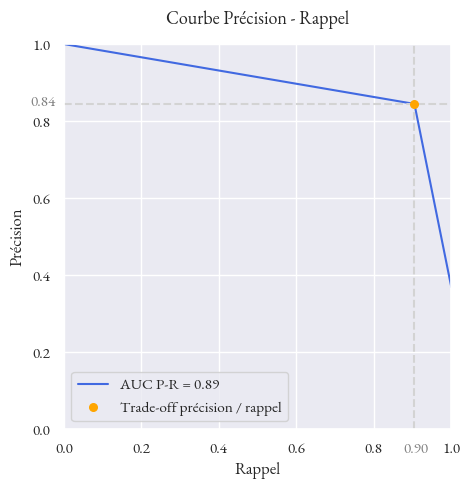

In [127]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Création du lineplot :
plt.plot(recall,
         precision, 
         color = 'royalblue', 
         label = f'AUC P-R = {auc_precision_rappel:.2f}')

# Calcul de la distance entre précision et rappel pour chaque point :
distances = np.abs(precision - recall)

# Recherche de l'indice du point avec le meilleur compromis :
index_closest = np.argmin(distances)

# Rappel et précision pour ce point :
recall_closest = recall[index_closest]
precision_closest = precision[index_closest]

# Tracé du point correspondant au meilleur compromis :
plt.scatter(recall_closest, 
            precision_closest, 
            color = 'orange', 
            s = 30, 
            zorder = 5, 
            label = "Trade-off précision / rappel")

# Tracé des lignes de projection :
plt.axvline(x = recall_closest, 
            color = 'lightgrey', 
            linestyle = '--')
plt.axhline(y = precision_closest, 
            color = 'lightgrey', 
            linestyle = '--')

# Affichage du rappel optimal sur l'axe des x :
plt.annotate(f'{recall_closest:.2f}', 
             xy = (recall_closest, 0), 
             xytext = (recall_closest, -15),
             textcoords = 'offset points', 
             color = 'grey', 
             fontsize = 11,
             va = 'center',
             ha = 'center')

# Affichage de la précision optimale sur l'axe des y :
plt.annotate(f'{precision_closest:.2f}', 
             xy = (0, precision_closest), 
             xytext = (-15, precision_closest),
             textcoords = 'offset points', 
             color = 'grey', 
             fontsize = 11,
             ha = 'center',
             va = 'center')

# Ajout d'un titre au graphique :
plt.title('Courbe Précision - Rappel', 
          fontsize = 13,
          pad = 15)

# Ajout d'un titre à l'axe des x :
plt.xlabel('Rappel')

# Ajout d'un titre à l'axe des y :
plt.ylabel('Précision')

# Ajustement des limites des axes :
plt.xlim(0, 1)
plt.ylim(0, 1)

# Affichage du quadrillage :
plt.grid(True)

# Affichage de la légende :
plt.legend()

# Affichage du graphique :
plt.show()

> Il n'y a pas de différence entre sensibilité et rappel dans le cas d'une classification binaire.

> La précision mesure la proportion de prédictions positives correctes parmi toutes les prédictions positives faites par le modèle, tandis que le rappel évalue la capacité du modèle à identifier tous les exemples positifs réels. 

> Dans un modèle parfait, on obtiendrait à la fois 100 % de précision (aucun faux positif) et 100 % de rappel (aucun faux négatif). 

> Cependant, dans la pratique, ces deux objectifs sont souvent difficiles à atteindre simultanément, car améliorer la précision peut parfois réduire le rappel et inversement. 

> C'est pourquoi l'on parle de compromis (trade-off) entre ces deux métriques.

# III. PROJET 3 - CONSOMMATION D'ESSENCE

## A. ARBRE DE REGRESSION ET RMSE

### 1. Import de DecisionTreeRegressor 

#### a. Préparation des données

In [128]:
# Import du jeu de données :
auto = pd.read_csv("dataset-c.csv", 
                   sep = ",",
                   encoding = "utf-8",
                   engine = "python",
                   decimal = ",")

In [129]:
# Affichage des premières lignes du tableau pour s'assurer de l'import du dataset :
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


#### b. Nettoyage des données

In [130]:
# Affichage des informations sur le tableau :
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [131]:
# Affichage du nombre de lignes :
print("Nombre de lignes :", auto.shape[0])

# Affichage du nombre de colonnes :
print("Nombre de colonnes :", auto.shape[1])

Nombre de lignes : 398
Nombre de colonnes : 9


In [132]:
# Affichage du type de variables :
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object


In [133]:
# Affichage des valeurs uniques de la colonne 'horsepower' :
auto['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [134]:
# Suppression des lignes avec 'horsepower' = '?' :
auto = auto[auto['horsepower'] != '?']
print(auto.shape)

(392, 9)


In [135]:
# Affichage des types de variables :
auto['horsepower'] = auto['horsepower'].astype('float')


In [136]:
# Valeurs uniques de la colonne 'car_name' :
print("Les valeurs uniques de la variable 'car name' sont ")
print(auto['car name'].unique())

Les valeurs uniques de la variable 'car name' sont 
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'plymouth satellite custom'
 'ford torino 500' 'amc matador' 'pontiac catalina brougham'
 'dodge monaco (sw)' 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricke

> On peut s'apercevoir que la colonne 'car name' ne sera pas utile dans le cadre de l'entrainement du modèle, en effet les données trop variables seront difficilement exploitables.

In [137]:
# Suppression de la colonne 'car name' :
auto = auto.drop(columns=['car name'])
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1


In [138]:
# Affichage des types de données après traitement :
print(auto.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object


In [139]:
# Décompte du nombre de doublons :
nb_doublons = auto.duplicated().sum()

# Affichage du nombre de doublons :
print(f"Il existe {nb_doublons} doublon(s).")

Il existe 0 doublon(s).


In [140]:
# Affichage des valeurs nulles :
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [141]:
# Affichage de la description du tableau :
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### c. Analyse des variables

> mpg : efficacité énergétique de la voiture, exprimé en miles par gallon

> cylinders : nombre de cylindres dans le moteur de la voiture

> displacement : volume du moteur (en pouces cubes)

> horsepower : puissance du moteur, en chevaux (hp)

> weight : poids de la voiture (en livres)

> acceleration : accélération (en secondes pour passer de 0 à 60 miles/h)

> model year : année de fabrication du modèle de la voiture

> origin : origine de la voiture (1 = USA, 2 = Europe, 3 = Japon)

> car name : nom de la voiture, incluant la marque et le modèle.

> Quantitatives continues : mpg, displacement, horsepower, weight, acceleration

> Quantitatives discrètes : cylinders, model year

> Qualitatives nominales : car name, origin

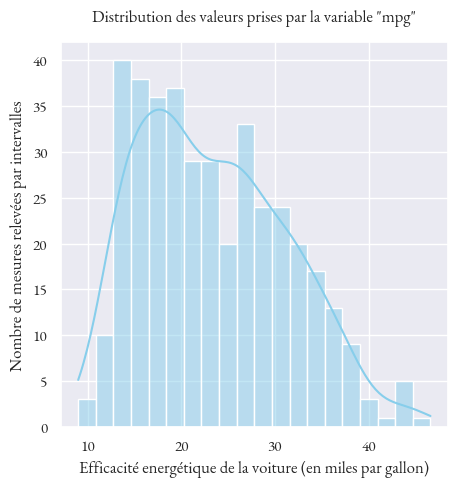

In [142]:
# Création de la figure :
plt.figure(figsize=(5, 5)) 

# Création de l'histogramme :
sns.histplot(auto['mpg'], 
             bins = 20, 
             kde = True, 
             color = 'skyblue')

# Ajout d'un titre à la figure :
plt.title('Distribution des valeurs prises par la variable "mpg"',
          pad = 15,
          fontsize = 12)

# Personnalisation des étiquettes des axes :
plt.xlabel('Efficacité energétique de la voiture (en miles par gallon)')
plt.ylabel('Nombre de mesures relevées par intervalles')

# Affichage de l'histogramme :
plt.show()

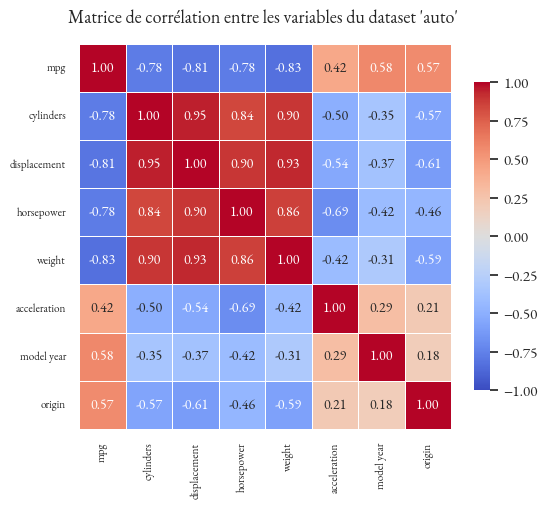

In [143]:
# Calcul de la matrice de corrélation entre les variables :
correlation_matrix = auto.corr()

# Création de la figure :
plt.figure(figsize = (6, 5))

# Affichage de la matrice de corrélation :
sns.heatmap(correlation_matrix, 
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, 
            vmax = 1,
            linewidths = 0.5,
            fmt = '.2f',
            cbar_kws = {'shrink': 0.8})

# Ajout d'un titre au graphique :
plt.title("Matrice de corrélation entre les variables du dataset 'auto' ", 
          fontsize = 13,
          pad = 15)

# Personnalisation des labels des axes :
plt.xticks(fontsize = 8, 
           rotation = 90)
plt.yticks(fontsize = 8, 
           rotation = 0)

# Affichage du graphique :
plt.show()

> Les variables 'cylinders' et 'weight' sont très fortement corrélées (0.95).

> Les variables 'displacement' et 'weight' sont très fortement corrélées (0.93).

> La variable 'weight' sera donc supprimée pour éviter la colinéarité.

In [144]:
# Suppression de la variable 'weight' :
auto = auto.drop('weight', 
                 axis = 1)

In [145]:
# Affichage du titre des colonnes :
print(auto.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'acceleration',
       'model year', 'origin'],
      dtype='object')


In [146]:
# Affichage des valeurs prises par 'origin' :
print("Les valeurs prises par la variable 'origine' sont :", auto['origin'].unique())   # Recherche des outliers / valeurs aberrantes

Les valeurs prises par la variable 'origine' sont : [1 3 2]


In [147]:
# Calcul des valeurs min et max pour 'cylinders' et 'model year' (recherche des outliers / valeurs aberrantes) :
cylinders_min = auto['cylinders'].min()  
cylinders_max = auto['cylinders'].max()
model_year_min = auto['model year'].min()
model_year_max = auto['model year'].max()
print(f"Min de cylinders : {cylinders_min}, Max de cylinders : {cylinders_max}")
print(f"Min de model year : {model_year_min}, Max de model year : {model_year_max}")

Min de cylinders : 3, Max de cylinders : 8
Min de model year : 70, Max de model year : 82


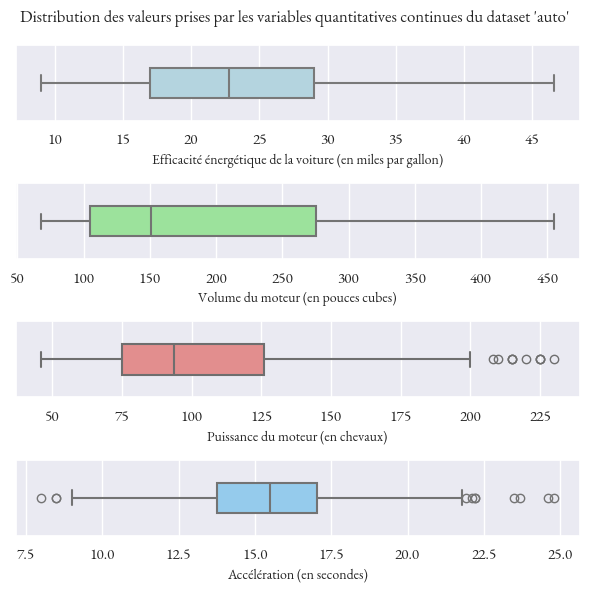

In [148]:
# Liste des variables à afficher :
variables = ['mpg', 
             'displacement', 
             'horsepower', 
             'acceleration']

# Création de la figure avec 4 sous-graphes :
fig, axes = plt.subplots(4, 
                         1, 
                         figsize = (6, 6))

# Dictionnaire des titres personnalisés pour l'axe des x :
x_labels = {'mpg': 'Efficacité énergétique de la voiture (en miles par gallon)',
            'displacement': 'Volume du moteur (en pouces cubes)',
            'horsepower': 'Puissance du moteur (en chevaux)',
            'acceleration': 'Accélération (en secondes)'}

# Palette de couleurs personnalisée :
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue']

# Création d'un boxplot pour chaque variable de la liste :
for i, var in enumerate(variables):
    sns.boxplot(x = auto[var], 
                ax = axes[i], 
                width = 0.4,
                linewidth = 1.5,
                color = colors[i])
    axes[i].set_xlabel(x_labels[var], fontsize = 10)

# Ajout d'un titre au graphique :
plt.suptitle("Distribution des valeurs prises par les variables quantitatives continues du dataset 'auto'", 
             fontsize = 12)

# Affichage du graphique :
plt.tight_layout()
plt.show()

In [149]:
# Calcul des quartiles pour 'horsepower' :
Q1 = auto['horsepower'].quantile(0.25)
Q3 = auto['horsepower'].quantile(0.75)

# Calcul de l'IQR :
IQR = Q3 - Q1

# Calcul des bornes pour les outliers :
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des outliers :
outliers = auto[(auto['horsepower'] < lower_bound) | (auto['horsepower'] > upper_bound)]

# Calcul du nombre d'outliers et du taux d'outliers :
outlier_count = outliers.shape[0]
total_count = auto.shape[0]
outlier_rate = outlier_count / total_count

# Affichage des résultats :
print(f"Taux d'outliers pour 'horsepower' : {outlier_rate:.2%} ({outlier_count} outliers sur {total_count} données).")

Taux d'outliers pour 'horsepower' : 2.55% (10 outliers sur 392 données).


In [150]:
# Calcul des quartiles pour 'acceleration' :
Q1 = auto['acceleration'].quantile(0.25)
Q3 = auto['acceleration'].quantile(0.75)

# Calcul de l'IQR :
IQR = Q3 - Q1

# Calcul des bornes pour les outliers :
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identification des outliers :
outliers = auto[(auto['acceleration'] < lower_bound) | (auto['acceleration'] > upper_bound)]

# Calcul du nombre d'outliers et du taux d'outliers :
outlier_count = outliers.shape[0]
total_count = auto.shape[0]
outlier_rate = outlier_count / total_count

# Affichage des résultats :
print(f"Taux d'outliers pour 'acceleration' : {outlier_rate:.2%} ({outlier_count} outliers sur {total_count} données).")

Taux d'outliers pour 'acceleration' : 2.81% (11 outliers sur 392 données).


> Ces taux d'outliers sont acceptables car faibles.

In [151]:
# Exclusion de 'mpg' de la liste des features
features = auto.drop(columns='mpg')

# Affichage des variables retenues (noms des colonnes)
print("Les variables explicatives retenues pour prédire 'mpg' (cible) sont :", features.columns.tolist())

Les variables explicatives retenues pour prédire 'mpg' (cible) sont : ['cylinders', 'displacement', 'horsepower', 'acceleration', 'model year', 'origin']


#### d. Import de DecisionTreeRegressor

Pour plus de détails, voir la section [I.1.a. Préparation des données](#preparation-des-donnees)

### 2. Instanciation de dt 

In [152]:
# Séparation des caractéristiques (X) et des étiquettes (y) :
X = auto.drop(columns = ["mpg"]) 
y = auto["mpg"]

In [153]:
# Séparation des données en deux ensembles (80% entrainement, 20% test) :
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = SEED)

In [154]:
# Instanciation de l'abre de regression 'dt' :
dt = DecisionTreeRegressor(max_depth = 8,
                           min_samples_leaf = 0.13,
                           random_state = SEED)

In [155]:
# Entrainement de 'dt' sur l'ensemble de données d'entrainement :
dt.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,0.13
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### 3. Affichage de l’arbre de régression

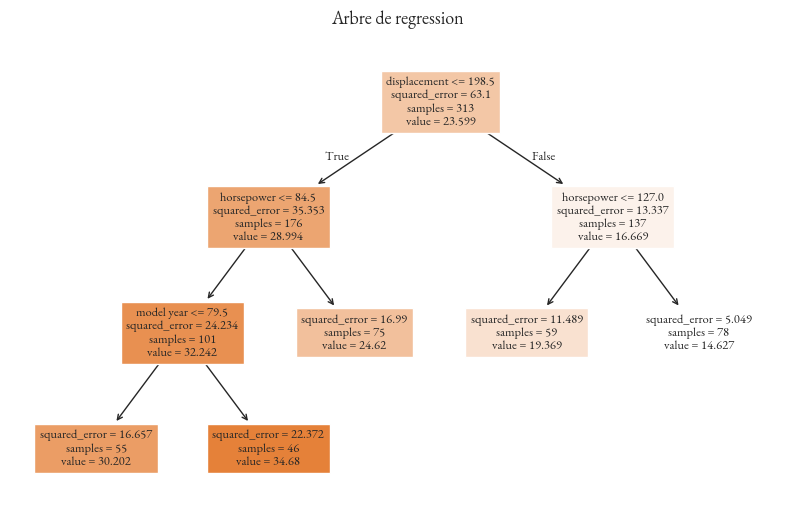

In [156]:
# Création de la figure : 
plt.figure(figsize = (10, 6))

# Création de l'abre de régression :
plot_tree(dt, 
          filled = True, 
          feature_names = X.columns, 
          fontsize = 9)

# Ajout d'un titre à la figure :
plt.title("Arbre de regression",
          fontsize = 13,
          pad = 15)

# Affichage de l'arbre de regression :
plt.show()

### 4. Import de mean_squared_error

> Pour plus de détails, voir la section [I.1.a. Préparation des données](#preparation-des-donnees)

### 5. Calcul et comparaison des erreurs (MAE, MSE, RMSE)

#### a. MAE

In [157]:
# Prédiction des étiquettes de l'ensemble de données de test :
y_pred = dt.predict(X_test)

In [158]:
# Calcul du MAE :
mae_dt = sum(abs(y_test - y_pred)) / len(y_test)

#### b. MSE

In [159]:
# Calcul de l'erreur quadratique moyenne (MSE) sur le jeu de données test :
mse_dt = MSE(y_test, y_pred)

#### c. RMSE

In [160]:
# calcul de la racine de l'erreur quadratique moyenne (RMSE) sur le jeu de test :
rmse_dt = mse_dt**(1/2)
print(rmse_dt.round(2))

AttributeError: 'float' object has no attribute 'round'

> y_test sont les valeurs réelles du jeu de données de test et y_pred sont les prédictions faites par le modèle sur les données de test. Comparer y_test et y_pred permet d'évaluer la performance du modèle.

> Le MAE donne une idée de l'ampleur moyenne de l'erreur sans tenir compte de sa direction (positives ou négatives).

> Un MSE élevé indique généralement qu'il y a des erreurs importantes dans les prédictions.

> Le RMSE pénalise également fortement les grandes erreurs (comme le MSE), mais il est plus interprétable car il est dans les mêmes unités que les données. Il donne une idée de la magnitude des erreurs dans les mêmes termes que les données observées.

### 6. Calcul de RMSE_train

In [ ]:
# Prédiction des étiquettes de l'ensemble de données d'entraînement :
y_train_pred = dt.predict(X_train)

In [ ]:
# Calcul de l'erreur quadratique moyenne (MSE) sur le jeu de données d'entraînement :
mse_train = MSE(y_train, y_train_pred)

In [ ]:
# Calcul de la racine de l'erreur quadratique moyenne (RMSE) sur le jeu d'entraînement :
rmse_train = mse_train**(1/2)
print(rmse_train.round(2))

3.7


> La RMSE sur le jeu d'entraînement mesure l'erreur moyenne entre les prédictions de notre modèle et les valeurs réelles pour les données d'entraînement. Elle indique à quel point le modèle s'ajuste aux données sur lesquelles il a été entraîné.

> Un RMSE élevé sur le jeu d'entraînement peut indiquer que le modèle ne parvient pas à bien s'ajuster aux données d'entraînement, ce qui pourrait être le signe :
> - d'un modèle trop simple (sous-ajustement), qui n'a pas capturé la complexité des données,
> - d'une mauvaise configuration des hyperparamètres du modèle, tels que la profondeur maximale dans un arbre de décision, limitant la capacité du modèle à s'adapter aux variations des données.

> En général, lorsque le nombre d'échantillons d'entraînement augmente, la RMSE tend à diminuer. 

> Un plus grand ensemble d'échantillons permet au modèle d'apprendre un schéma plus précis et représentatif des données globales, réduisant ainsi l'erreur sur ces données. 

> Cependant, au-delà d'un certain nombre d'échantillons, la RMSE sur le jeu d'entraînement se stabilise car le modèle aura déjà capturé la structure sous-jacente des données.

### 7. Construction et interprétation d’une courbe d’apprentissage

In [ ]:
# Portions de données d'entraînement de 10% à 80% :
train_sizes = np.linspace(start = 0.1, 
                          stop = 0.80, 
                          num = 200)  

# Liste pour stocker les RMSE d'entraînement :
train_errors = []

# Liste pour stocker les RMSE de validation :
val_errors = []

# Boucle sur les différentes tailles d'échantillons d'entraînement :
for train_size in train_sizes:

    # Diviser les données d'entraînement selon la taille spécifiée :
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        train_size = train_size, 
                                                        random_state = SEED)
    
    # Création du modèle d'entrainement :
    dt = DecisionTreeRegressor(max_depth = 8,
                               min_samples_leaf = 0.13, 
                               random_state = SEED)
    
    # Entrainement du modèle sur le jeu de données :
    dt.fit(X_train, y_train)
    
    # Calcul des prédictions et du RMSE sur l'ensemble d'entraînement :
    y_train_pred = dt.predict(X_train)
    rmse_train = MSE(y_train, y_train_pred)**(1/2) 
    train_errors.append(rmse_train)
    
    # Calcul des prédictions et du RMSE sur l'ensemble de validation :
    y_val_pred = dt.predict(X_test)
    rmse_val = MSE(y_test, y_val_pred)**(1/2)
    val_errors.append(rmse_val)

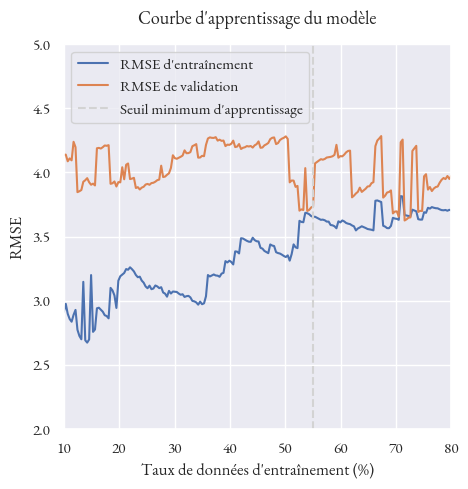

In [ ]:
# Affichage de la courbe d'apprentissage :
plt.figure(figsize = (5, 5))

# Création du tracé linéaire pour le RMSE d'entrainement :
plt.plot(train_sizes * 100, 
         train_errors, 
         label = "RMSE d'entraînement")

# Création  du tracé linéaire pour le RMSE de validation :
plt.plot(train_sizes * 100, 
         val_errors, 
         label = "RMSE de validation")

# Ajout d'une étiquette sur l'axe des x : 
plt.xlabel("Taux de données d'entraînement (%)")

# Ajout d'une étiquette sur l'axe des y :
plt.ylabel("RMSE")

# Affichage du titre :
plt.title("Courbe d'apprentissage du modèle",
          fontsize = 13,
          pad = 15)

# Affichage de la grille :
plt.grid(True)

# Ajouter une ligne verticale à x = 67 :
plt.axvline(x = 55, 
            color = 'lightgrey', 
            linestyle = '--', 
            label = "Seuil minimum d'apprentissage")

# Définition des limites de l'axe des x :
plt.xlim(10, 80)  
plt.ylim(2, 5)

# Affichage de la légende :
plt.legend()

# Affichage du graphique :
plt.show()

> Au-delà d'un certain nombre d'échantillons, l'ajout de données d'entrainement n'améliore alors plus significativement les performances.

> La RMSE sur le jeu d'entrainement se stabilise car le modèle aura déjà capturé la structure sous-jacente des données.

## B. VALIDATION CROISEE

### 1. Principe de la validation croisée 

> Le principe de la validation croisée consiste à diviser les données en plusieurs sous-ensembles ou "folds" (ou blocs). Dans le cas d'une validation croisée à k blocs (ou k-fold), les données sont divisées en k sous-ensembles de taille à peu près égale. Par exemple, dans une validation croisée à 10 blocs (10-fold), les données sont divisées en 10 sous-ensembles. À chaque itération, le modèle est entraîné sur k−1 blocs et testé sur le bloc restant.

> Ainsi, dans une validation croisée à 10 blocs :
>   1. Les données sont divisées en 10 blocs.
>   2. Le modèle est entraîné 10 fois, chaque fois sur 9 blocs (90 % des données) et testé sur le bloc restant (10 % des données).
>   3. À chaque itération, l'erreur sur le bloc de test est calculée, par exemple en utilisant des métriques comme l'erreur quadratique moyenne (Mean Squared Error, MSE) pour les problèmes de régression ou l'erreur de classification pour les problèmes de classification.
>   4. L’erreur finale de validation croisée est ensuite obtenue en prenant la moyenne des erreurs obtenues pour chaque bloc de test.

### 2. Intérêt de la validation croisée et comparaison avec le bootstrapping

> La validation croisée permet :
>   - de détecter un surapprentissage,
>   - d'estimer la perfomance moyenne du modèle de manière robuste,
>   - d'ajuster les hyperparamètres du modèle.

> Celle-ci s'oppose au bootstrapping qui est une méthode d'échantillonnage aléatoire avec remise :
> - On génère plusieurs échantillons d’entraînement de même taille que le jeu de données initial en tirant au hasard (et avec remise) des observations du jeu de données.
> - Certaines observations peuvent apparaître plusieurs fois dans un échantillon, tandis que d’autres peuvent ne pas être présentes du tout.

> La validation croisée et le bootstrapping sont ainsi deux méthodes d’évaluation qui diffèrent par leur approche de l’échantillonnage.

> Leur mise en œuvre peut être coûteuse en calcul et en temps, ce qui peut limiter leur utilisation pour des modèles complexes ou des ensembles de données très volumineux.

> Toutefois, ces deux approches aident à lutter contre le surentraînement en améliorant la façon dont les modèles sont évalués, ce qui mène à une meilleure généralisation sur des données nouvelles :

> - Validation croisée : évalue un modèle en le testant sur plusieurs sous-ensembles des données. Chaque observation est utilisée pour le test à un moment donné, ce qui empêche le modèle de se concentrer uniquement sur un sous-ensemble d'entraînement spécifique. Cela permet de détecter si un modèle surapprend les détails de l'entraînement, car sa performance varie selon les blocs de test. En moyenne, cette approche donne une évaluation plus robuste de la capacité de généralisation du modèle.

> - Bootstrapping : génère plusieurs échantillons d'entraînement avec remise, ce qui signifie que chaque modèle est testé sur des données différentes à chaque itération. Cela permet d'évaluer la performance du modèle sur des données non vues pendant l'entraînement (données de test), réduisant ainsi le risque qu'un modèle soit trop ajusté aux spécificités de l'échantillon d'entraînement. En calculant la performance sur plusieurs échantillons, on obtient une estimation plus fiable de la capacité de généralisation.

### 3. Forêt Aléatoire vs Bagging : choix des variables et intérêt de la méthode

> Dans une forêt aléatoire, chaque arbre est construit de manière similaire avec des sous-échantillons du jeu de données, mais à chaque split, au lieu de considérer toutes les variables, on choisit aléatoirement un sous-ensemble de variables parmi lesquelles l'arbre sélectionnera celle qui donne la meilleure partition. Ce processus introduit un niveau supplémentaire d'aléa par rapport au bagging classique.

> L'intérêt d'une forêt aléatoire par rapport au bagging classique est qu'elle réduit la variance en augmentant la diversité des arbres grâce à l'échantillonnage aléatoire des variables à chaque split, ce qui améliore la généralisation du modèle et réduit le phénomène de surentrainement.

### 4. Implémentation d'une forêt aléatoire pour la régression

In [ ]:
#  Division des données en ensembles d'entraînement et de test :
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = SEED)

In [ ]:
# Création du modèle RandomForestRegressor :
rf_regressor = RandomForestRegressor(max_depth = 4,           
                                     min_samples_leaf = 0.26,
                                     random_state = SEED)

In [ ]:
# Entraînement du modèle RandomForestRegressor :
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=0.26, random_state=42)

### 5. Évaluation du modèle : calcul du RMSE avec validation croisée

In [ ]:
# Prédiction des étiquettes du jeu d'entrainement :
y_predict_train = rf_regressor.predict(X_train)

In [ ]:
# Calcul du RMSE en utilisant la validation croisée :
rmse = -cross_val_score(rf_regressor,   # négatif par défaut, c'est pourquoi il est inversé dans le code
                         X_train, 
                         y_train, 
                         cv = 10, 
                         scoring = 'neg_root_mean_squared_error',
                         n_jobs = -1)

In [ ]:
# Affichage des résultats :
print("RMSE pour chaque pli de la validation croisée :")
print(rmse.round(2))
print(' ')
print("RMSE moyen :", np.mean(rmse).round(2))

RMSE pour chaque pli de la validation croisée :
[4.86 4.75 5.39 5.48 5.75 5.68 4.02 3.86 4.58 5.29]
 
RMSE moyen : 4.97


In [ ]:
print("Valeur minimale de y :", y.min())
print("Valeur maximale de y :", y.max())

Valeur minimale de y : 9.0
Valeur maximale de y : 46.6


# IV. PROJET 4 #

## A. BAGGING CONTRE FORETS ALEATOIRES

### 1. Principes du bootstrapping et du bagging

> Le bootstrapping est une méthode statistique qui consiste à générer de nouvelles données en échantillonnant avec remise un ensemble de données existant. L'objectif est de créer plusieurs sous-échantillons similaires aux données d'origine pour estimer la variabilité des statistiques (comme la moyenne ou la variance) et obtenir des intervalles de confiance. Cette technique est largement utilisée en machine learning pour évaluer la robustesse des modèles.

> Le bagging (Bootstrap Aggregating) est une technique d'ensemble en apprentissage automatique qui combine plusieurs modèles pour améliorer la performance et réduire la variance. Il repose sur le bootstrapping pour générer plusieurs sous-échantillons du jeu de données, puis entraîne un modèle indépendant sur chacun de ces sous-échantillons. Les prédictions finales sont ensuite obtenues par vote majoritaire (pour la classification) ou moyenne (pour la régression) des prédictions de chaque modèle.

### 2. Préparation du jeu de données : split 70/30

#### a. Préparation des données

In [ ]:
# Import du jeu de données :
liver = pd.read_csv("dataset-d.csv", 
                                   sep = ",",
                                   encoding = "utf-8",
                                   engine = "python",
                                   decimal = ",")

In [ ]:
# Affichage des premières lignes du jeu de données :
liver.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1


#### b. Nettoyage des données

In [ ]:
# Affichage des informations sur les variables :
liver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
# Affichage du nombre de lignes :
print("Nombre de lignes :", liver.shape[0])

# Affichage du nombre de colonnes :
print("Nombre de colonnes :", liver.shape[1])

Nombre de lignes : 583
Nombre de colonnes : 11


In [ ]:
# Affichage du type de variables :
print(liver.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


In [ ]:
# Affichage du contenu de la colonne 'Gender' :
print(liver['Gender'].unique())

['Female' 'Male']


In [ ]:
# Conversion du contenu de 'Gender' en valeurs numériques :
liver['Gender'] = liver['Gender'].map({'Female': 0,
                                       'Male': 1})

In [ ]:
# Conversion en variable numérique :
liver['Gender'] = liver['Gender'].astype('int')
print(liver.dtypes)

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object


In [ ]:
# Décompte du nombre de doublons :
nb_doublons = liver.duplicated().sum()

# Affichage du nombre de doublons :
print(f"Il existe {nb_doublons} doublon(s).")

Il existe 13 doublon(s).


> Dans le cas présent, les doublons seront conservés car il peut s'agir d'un test médical réalisé à des moments différents pour le même patient.

In [ ]:
# Affichage des valeurs nulles :
liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
# Suppression des lignes avec valeurs nulles :
liver = liver.dropna()

In [ ]:
# Affichage du nombre de lignes après suppression des doublons :
print("Nombre de lignes après suppression des valeurs nulles :", liver.shape[0])

Nombre de lignes après suppression des valeurs nulles : 579


In [ ]:
# Affichage du résumé des variables :
liver.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


#### c. Analyse des variables

> Age : Âge du patient (en années).

> Gender : Sexe du patient (Male/Female).

> Total_Bilirubin : Taux de bilirubine totale dans le sang (mg/dL).

> Direct_Bilirubin : Taux de bilirubine directe dans le sang (mg/dL).

> Alkaline_Phosphotase : Niveau de phosphatase alcaline (U/L).

> Alamine_Aminotransferase (ALT) : Niveau d'alanine aminotransférase (U/L).

> Aspartate_Aminotransferase (AST) : Niveau d'aspartate aminotransférase (U/L).

> Total_Proteins : Niveau de protéines totales (g/dL).

> Albumin : Taux d'albumine dans le sang (g/dL).

> Albumin_and_Globulin_Ratio (A/G) : Rapport albumine/globuline.

> Dataset : Classe cible indiquant si le patient a une maladie du foie (1) ou non (2).

> Qualitatif	Nominal	: Gender, Dataset

> Quantitatif	Continu	: Age, Total_Bilirubin, Direct_Bilirubin, Alkaline_Phosphotase, ALT, AST, Total_Proteins, Albumin, A/G Ratio

In [ ]:
# Décompte du nombre d'échantillons pour chaque espèce de manchots :
malades_nb = liver['Dataset'].value_counts()

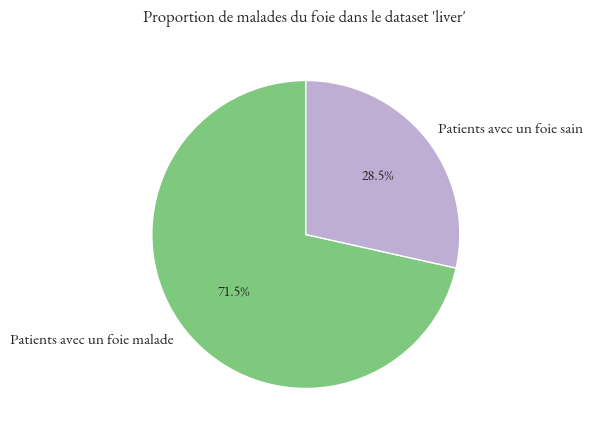

In [ ]:
# Dictionnaire pour le mapping :
label_replacement = {1: 'Patients avec un foie malade', 2: 'Patients avec un foie sain'}

# Création de la figure :
plt.figure(figsize = (5, 5))

# Création du pie chart :
plt.pie(malades_nb, 
        labels = [label_replacement.get(i, i) for i in malades_nb.index],
        autopct = '%1.1f%%',
        startangle = 90,
        colors = plt.get_cmap('Accent').colors)

# Ajout du titre :
plt.title("Proportion de malades du foie dans le dataset 'liver' ",
          fontsize = 12,
          pad = 15)

# Affichage du graphique :
plt.show()

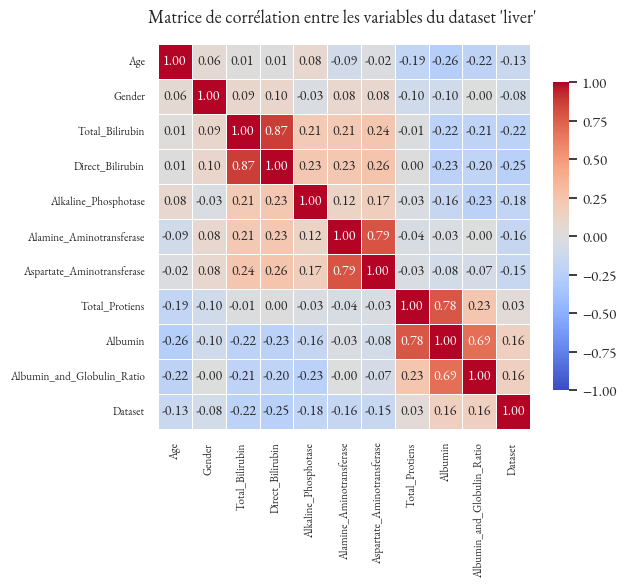

In [ ]:
# Calcul de la matrice de corrélation entre les variables :
correlation_matrix = liver.corr()

# Création de la figure :
plt.figure(figsize = (6, 5))

# Affichage de la matrice de corrélation :
sns.heatmap(correlation_matrix, 
            annot = True,
            cmap = 'coolwarm',
            vmin = -1, 
            vmax = 1,
            linewidths = 0.5,
            fmt = '.2f',
            cbar_kws = {'shrink': 0.8})

# Personnalisation du titre et des axes :
plt.title("Matrice de corrélation entre les variables du dataset 'liver' ", 
          fontsize = 13,
          pad = 15)
plt.xticks(fontsize = 8, rotation= 90)
plt.yticks(fontsize = 8, rotation = 0)

# Affichage du graphique :
plt.show()

> Il n'y a pas de risque de colinéarité.

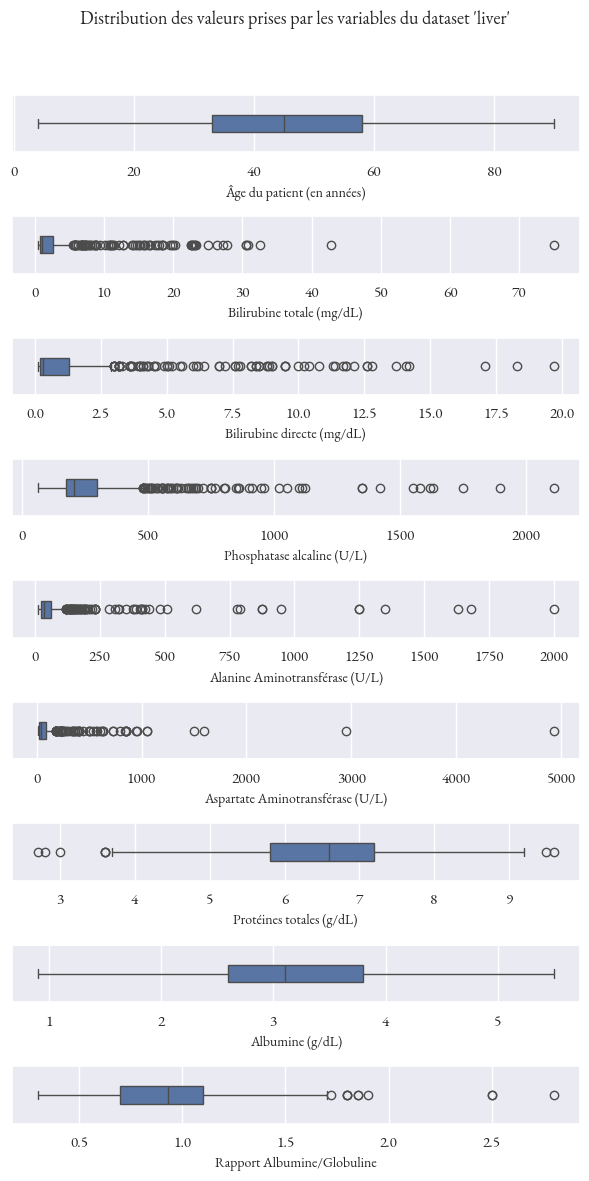

In [ ]:
# Liste des variables quantitatives continues à afficher :
variables = liver.drop(columns=['Dataset', 'Gender']).columns

# Dictionnaire des titres personnalisés pour l'axe des x :
x_labels = {
    'Age': 'Âge du patient (en années)',
    'Total_Bilirubin': 'Bilirubine totale (mg/dL)',
    'Direct_Bilirubin': 'Bilirubine directe (mg/dL)',
    'Alkaline_Phosphotase': 'Phosphatase alcaline (U/L)',
    'Alamine_Aminotransferase': 'Alanine Aminotransférase (U/L)',
    'Aspartate_Aminotransferase': 'Aspartate Aminotransférase (U/L)',
    'Total_Protiens': 'Protéines totales (g/dL)',
    'Albumin': 'Albumine (g/dL)',
    'Albumin_and_Globulin_Ratio': 'Rapport Albumine/Globuline'
}

# Création de la figure :
fig, axes = plt.subplots(len(variables), 1, figsize=(6, 12))

# Création d'un boxplot pour chaque variable de la liste :
for i, var in enumerate(variables):
    sns.boxplot(x=liver[var], 
                ax=axes[i], 
                width=0.3)
    
    # Ajout de l'étiquette personnalisée de l'axe des x :
    axes[i].set_xlabel(x_labels.get(var, var), fontsize=10)

# Ajout d'un titre principal :
plt.suptitle("Distribution des valeurs prises par les variables du dataset 'liver'",
             fontsize=13)

# Ajustement du layout et affichage du graphique :
plt.tight_layout(rect=[0, 0, 1, 0.95]) 
plt.show()

> Les variables suivantes semblent avoir un nombre important d'outliers :
>   - 'Total_Bilirubin', 
>   - 'Direct_Bilirubin',
>   - 'Alkaline_Phosphotase', 
>   - 'Alamine_Aminotransferase',
>   - 'Aspartate_Aminotransferase'

> Cela mérite une analyse plus fine.


In [ ]:
# Sélection des colonnes concernées :
colonnes_cibles = [
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkaline_Phosphotase',
    'Alamine_Aminotransferase',
    'Aspartate_Aminotransferase'
]

# Calcul des quartiles Q1 et Q3 pour chaque colonne ciblée :
Q1 = liver[colonnes_cibles].quantile(0.25)
Q3 = liver[colonnes_cibles].quantile(0.75)
IQR = Q3 - Q1

# Détection des outliers pour chaque colonne ciblée :
outliers = (liver[colonnes_cibles] < (Q1 - 1.5 * IQR)) | (liver[colonnes_cibles] > (Q3 + 1.5 * IQR))

# Comptage des outliers pour chaque colonne :
outliers_summary = outliers.sum()

# Tri par ordre décroissant des colonnes avec le plus grand nombre d'outliers :
outliers_sorted = outliers_summary.sort_values(ascending=False)

# Calcul du nombre total de lignes du DataFrame :
total_rows = liver.shape[0]

# Calcul des proportions d'outliers pour chaque colonne :
outliers_proportion = (outliers_summary / total_rows) * 100

# Tri des proportions d'outliers par ordre décroissant : 
outliers_proportion_sorted = outliers_proportion.sort_values(ascending=False)

# Affichage des proportions d'outliers par variable en pourcentage :
print("\nProportions d'outliers par variable (%) :\n")
print(outliers_proportion_sorted.round(2))


Proportions d'outliers par variable (%) :

Total_Bilirubin               14.51
Direct_Bilirubin              13.99
Alamine_Aminotransferase      12.44
Alkaline_Phosphotase          11.92
Aspartate_Aminotransferase    11.40
dtype: float64


> Les données sont conservées car il s'agit de données médicales qui peuvent par exemple révéler une maladie rare.

#### d. Division du jeu en ensembles d'entrainement et de test

In [ ]:
# Séparation des caractéristiques (X) et des étiquettes (y) :
X = liver.drop(columns = ["Dataset"]) 
y = liver["Dataset"]

In [ ]:
# Affichage de l'objet X :
X.head(3)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89


In [ ]:
# affichage de l'objet y :
print(y.head(3))
type(y)

0    1
1    1
2    1
Name: Dataset, dtype: int64


pandas.core.series.Series

In [ ]:
# Préparation du jeu de données d’entraînement avec un split 70/30 :
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = SEED)

### 3. Application du bagging 

#### a. Instanciation du modèle

In [ ]:
# Instanciation de dt :
dt = DecisionTreeClassifier(random_state = SEED)

In [ ]:
# Instanciation de bc :
bc = BaggingClassifier(estimator = dt,
                       oob_score = True,
                       random_state = SEED)

In [ ]:
# Entraînement du modèle sur les données d'entraînement :
bc.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  oob_score=True, random_state=42)

In [ ]:
# Prédictions sur l'ensemble de test :
y_pred = bc.predict(X_test)

#### b. Calcul des métriques de performance

In [ ]:
# Calcul de l'accuracy :
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", round(accuracy, 2))

# Calcul du recall :
recall = recall_score(y_test, 
                      y_pred, 
                      pos_label = 2)   # Etiquette '2' = malade
print("Recall :", round(recall, 2))

# Calcul de l'auc :
y_pred_proba = bc.predict_proba(X_test) 
auc = roc_auc_score(y_test, 
                    y_pred_proba[:, 1])
print("AUC : ", round(auc, 2))

Accuracy : 0.68
Recall : 0.18
AUC :  0.73


### 4. Application de forêt aléatoire

#### a. Instanciation d'une forêt aléatoire

In [ ]:
# Instanciation d'une forêt aléatoire :
rf = RandomForestClassifier(random_state = SEED)

In [ ]:
# Ajustement de 'rf' au jeu d'entrainement :
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prédiction des étiquettes du jeu de données test :
y_pred = rf.predict(X_test)

#### b. Calcul des métriques

In [ ]:
# Calcul de l'accuracy :
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", round(accuracy, 2))

# Calcul du recall :
recall = recall_score(y_test, y_pred)
print("Recall : ", round(recall, 2))

# Calcul de l'AUC :
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # Probabilité pour la classe 1 (malade)
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC : ", round(auc, 2))

Accuracy :  0.66
Recall :  0.91
AUC :  0.78


#### c. Comparaison des métriques des deux modèles

> 1. L'accuracy (précision globale) est similaire entre les deux modèles.

> 2. Recall (Sensibilité ou TPR - True Positive Rate)
>   - Bagging : 18 % des instances positives réelles sont correctement identifiées par le modèle
>   - Forêts aléatoires : 91 % des instances positives réelles sont correctement identifiées par le modèle

> Le modèle Forêts aléatoires a un rappel bien plus élevé que le modèle Bagging. Cela signifie que le modèle Forêts aléatoires est beaucoup plus efficace pour détecter les exemples positifs (cas de la classe cible). Un rappel élevé (comme dans le cas des forêts aléatoires) est souvent souhaitable dans des contextes où il est crucial de détecter le plus grand nombre possible de vrais positifs, même au prix de quelques faux positifs.

> 3. AUC (Area Under the Curve)
>   - Bagging : 73 % de l'aire sous la courbe ROC
>   - Forêts aléatoires : 78 % de l'aire sous la courbe ROC

> L'AUC pour les forêts aléatoires est légèrement meilleure que celle pour Bagging. Ce modèle est légèrement meilleur pour distinguer les classes positives et négatives à travers différents seuils.

> Le choix des forets aléatoires semble le plus adapté dans ce cas, car il permet de maximiser les chances de bien prédire les cas positifs et parait plus robuste au global.

### 5. Représentation de l'importance des caractéristiques

In [ ]:
# Création d'une pd.Series de l'importance des caractéristiques :
importances_rf = pd.Series(rf.feature_importances_, 
                           index = X.columns)

In [ ]:
# Tri de importances_rf :
sorted_importances_rf = importances_rf.sort_values()

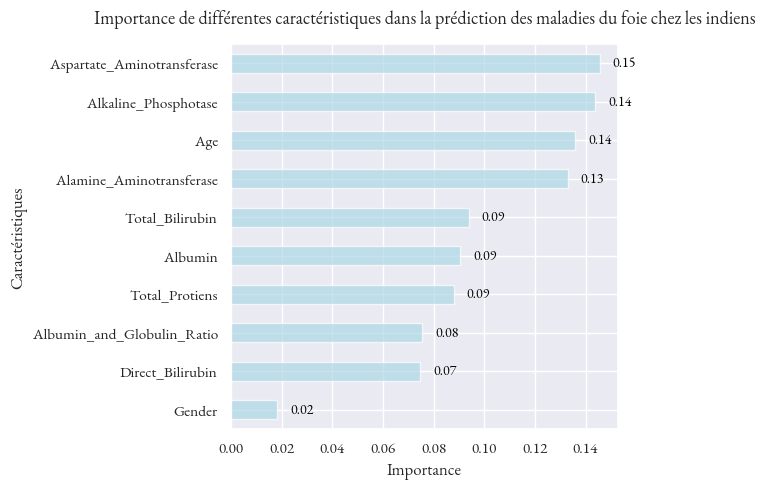

In [ ]:
# Création d'un barplot horizontal :
ax = sorted_importances_rf.plot(kind = 'barh', 
                                color = 'lightblue',
                                alpha = 0.7, 
                                figsize = (5, 5))

# Ajout d'un titre au graphique :
ax.set_title('Importance de différentes caractéristiques dans la prédiction des maladies du foie chez les indiens', 
             fontsize = 13,
             pad = 15)

# Ajout de l'étiquette à l'axe des x :
ax.set_xlabel('Importance')

# Ajout d'une étiquette à l'axe des y :
ax.set_ylabel('Caractéristiques')

# Affichage des valeurs d'importance sur les barres :
for i, v in enumerate(sorted_importances_rf):
    ax.text(v + 0.005, 
            i, 
            f'{v:.2f}', 
            color = 'black', 
            ha = 'left', 
            va = 'center')

# Affichage du graphique :
plt.show()

> L'importance est une valeur comprise entre 0 et 1, où :
>   - 0 indique une caractéristique sans importance,
>   - 1 représente la caractéristique la plus importante.

> On en déduit que les caractéristiques les plus prédictives sont :
> - asparate_aminotransferase, 
> - alkaline_phosphatase, 
> - age,
> - alamine_aminotransferase,
> - Alkaline_Phosphatase.

## B. COMPLEXITE DU MODELE, HYPERPARAMETRES ET GRIDSEARCH

### 1. Objectif de la Grid Search

> La Grid Search explore toutes les combinaisons possibles des hyperparamètres spécifiés afin d'identifier la configuration optimale pour le modèle.

> Cette approche permet d'atteindre les meilleures performances selon une métrique de performance choisie, telle que l'AUC, la précision, ou d'autres critères adaptés au problème à résoudre.

> Grâce à cette recherche exhaustive, la Grid Search réduit les risques de surajustement (overfitting) ou de sous-ajustement (underfitting), en ajustant les hyperparamètres de manière à améliorer la capacité du modèle à généraliser sur des données inconnues.

### 2. Instanciation d'une forêt aléatoire avec indice de Gini

In [ ]:
# Séparation des caractéristiques (X) et des étiquettes (y) :
X = liver.drop(columns = ["Dataset"]) 
y = liver["Dataset"]

In [ ]:
# Préparation du jeu de données d’entraînement avec un split 70/30 :
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 1)

In [ ]:
# Instanciation de la forêt aléatoire :
rf = RandomForestClassifier(n_estimators = 200,
                            criterion = 'gini',
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            random_state = 1)

### 3. Définition des paramètres pour la Grid Search

In [ ]:
# Définition des vecteurs de paramètres pour la grid search :
param_grid = {'max_depth': [2, 3, 4],
              'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]}

### 4. Optimisation des hyperparamètres avec GridSearchCV

Pour plus de détails, [voir la section _a. Préparation des données_](#preparation-des-donnees)

### 5. Configuration de la Grid Search avec l'AUC comme métrique de performance

In [ ]:
# Configuration de la grid search :
grid_dt = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       scoring = 'roc_auc',
                       cv = 10)

In [ ]:
# Entraînement du modèle sur les données :
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=200, random_state=1),
             param_grid={'max_depth': [2, 3, 4],
                         'min_samples_leaf': [0.12, 0.14, 0.16, 0.18]},
             scoring='roc_auc')

### 6. Extraction du meilleur modèle avec best_estimator_

In [ ]:
# Affichage des meilleurs paramètres trouvés par la grid search :
best_model = grid_dt.best_estimator_
print("Meilleur modèle :", best_model)

Meilleur modèle : RandomForestClassifier(max_depth=2, min_samples_leaf=0.16, n_estimators=200,
                       random_state=1)


In [ ]:
# Predict the test set probabilities of the positive class :
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [ ]:
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Test set ROC AUC score : {:.3f}".format(test_roc_auc))

Test set ROC AUC score : 0.758


### 7. Visualisation des résultats de la Grid Search

In [ ]:
# Récupération des résultats de la grid search dans un DataFrame pour visualisation :
results = pd.DataFrame(grid_dt.cv_results_)
print(results.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [ ]:
# Calcul de la moyenne des scores AUC pour chaque valeur de min_samples_leaf :
average_auc_by_min_samples_leaf = results.groupby('param_min_samples_leaf')['mean_test_score'].mean()
average_auc_by_min_samples_leaf

param_min_samples_leaf
0.12    0.723409
0.14    0.725103
0.16    0.725965
0.18    0.722414
Name: mean_test_score, dtype: float64

In [ ]:
# Calcul de la moyenne des scores AUC pour chaque valeur de param_max_depth :
average_auc_by_depth = results.groupby('param_max_depth')['mean_test_score'].mean()
average_auc_by_depth

param_max_depth
2    0.724251
3    0.724246
4    0.724171
Name: mean_test_score, dtype: float64

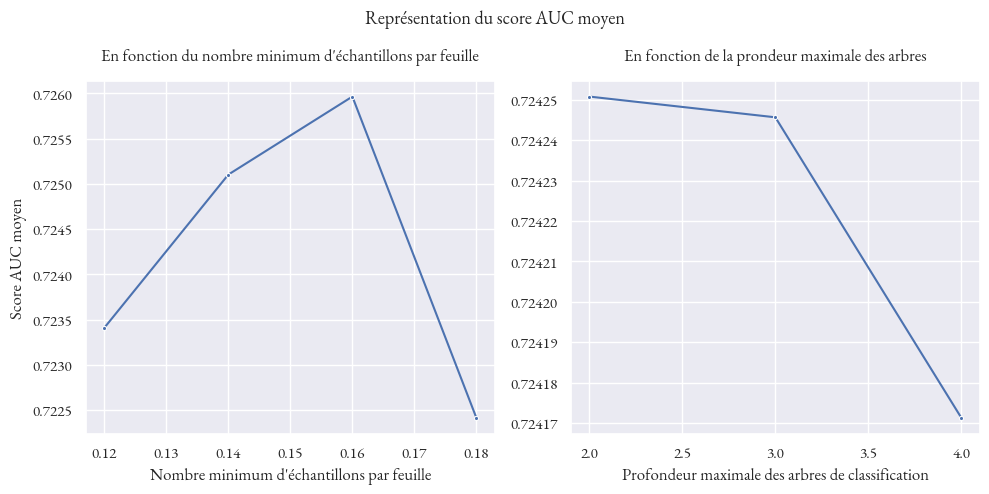

In [ ]:
# Création d'une une figure avec deux subplots côte à côte :
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

# ____________________Premier subplot_________________________

# Moyenne des scores AUC en fonction de min_samples_leaf :
sns.lineplot(x = average_auc_by_min_samples_leaf.index, 
             y = average_auc_by_min_samples_leaf.values, 
             marker = '.', 
             color = 'b', 
             ax = axes[0])

# Ajout des labels et un titre au premier subplot :
axes[0].set_xlabel("Nombre minimum d'échantillons par feuille")
axes[0].set_ylabel("Score AUC moyen")
axes[0].set_title("En fonction du nombre minimum d'échantillons par feuille", 
                  fontsize = 12, 
                  pad = 15)

# ________________________Deuxième subplot_____________________

# Moyenne des scores AUC en fonction de la profondeur des arbres :
sns.lineplot(x = average_auc_by_depth.index, 
             y = average_auc_by_depth.values, 
             marker = '.', 
             color = 'b', 
             ax = axes[1])

# Ajout des labels et un titre au deuxième subplot :
axes[1].set_xlabel("Profondeur maximale des arbres de classification")
axes[1].set_title("En fonction de la prondeur maximale des arbres", 
                  fontsize = 12, 
                  pad = 15)

# Ajout d'un titre global à la figure :
fig.suptitle("Représentation du score AUC moyen", 
             fontsize = 13)

# Ajustement de l'espacement entre les subplots :
plt.tight_layout()

# Affichage du graphique :
plt.show()

> On s'aperçoit ici que le meilleur modèle est un arbre de décision de profondeur = 2, avec un nombre minimum d'échantillons par feuilles = 0.16.